# Preprocessing data

https://arxiv.org/pdf/2108.13327v4

## Clean original dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

In [ ]:
file_path = '/content/drive/My Drive/nytimes_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:
data[:3]

[{'section': 'Health',
  'headline': 'F.D.A. Plans to Ban Most E-Cigarette Flavors but Menthol',
  'abstract': 'The tobacco and vaping industries and conservative allies intensively lobbied against a ban on popular flavored e-cigarettes.',
  'caption': 'A new study by the National Institute on Drug Abuse found that teenagers preferred mint and mango Juul flavors. Menthol was the least popular.',
  'image_url': 'https://static01.nyt.com/images/2019/11/06/science/05FDA-FLAVORS/05FDA-FLAVORS-facebookJumbo.jpg?year=2020&h=550&w=1050&s=ad27f3a70c71de51e7605bbbc258e54782257f2ebb657a8df4f0a833b1b42809&k=ZQJBKqZ0VN',
  'article_url': 'https://www.nytimes.com/2019/12/31/health/e-cigarettes-flavor-ban-trump.html',
  'image_id': '42d25485-0e48-50bf-8d16-948833b2a55d'},
 {'section': 'Science',
  'headline': 'Meteor Showers in 2020 That Will Light Up Night Skies',
  'abstract': "All year long, Earth passes through streams of cosmic debris. Here's a list of major meteor showers and how to spot one."


**These categories are the most aligned with analyzing market-entry risks.**

1. Economy - Economic insights and trends.
2. Technology - Innovations and digital transformations affecting markets.
3. Global Business - International business news and market conditions.
4. Real Estate - Market trends and investment opportunities.
5. Your Money - Personal finance and investment perspectives.
6. Automobiles - Industry-specific trends and risks.

In [ ]:
import json

# Load the dataset
file_path = '/content/drive/My Drive/nytimes_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Define the relevant categories for market entry risk analysis
relevant_categories = [
    'Economy', 'Technology', 'Global Business',
    'Real Estate', 'Your Money', 'Automobiles'
]

# Filter the dataset based on the relevant categories
filtered_data = [article for article in data if article.get('section') in relevant_categories]

# Save the filtered dataset to a new file
with open('filtered_nytimes_dataset.json', 'w') as outfile:
    json.dump(filtered_data, outfile, indent=4)

print(f"Filtered dataset saved with {len(filtered_data)} articles.")


Filtered dataset saved with 12031 articles.


In [ ]:
from google.colab import files
files.download('filtered_nytimes_dataset.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filtered_data[:5]

[{'section': 'Real Estate',
  'headline': 'Bedminster, N.J.: Horses, Golf and Presidential Visits',
  'abstract': 'Residents of the Somerset County township, who span the economic spectrum, often find the helicopters annoying. But the intrusion is usually short-lived.',
  'caption': 'Historic barns and white picket fences define the rural nature of much of Bedminster, which some residents say feels like being far from New Jersey.',
  'image_url': 'https://static01.nyt.com/images/2020/01/01/realestate/01LIVING-BEDMINSTER-slide-GOPR/01LIVING-BEDMINSTER-slide-GOPR-facebookJumbo.jpg?year=2020&h=550&w=1050&s=9544125f5762a081c2debf5013fb32e7f754a112676a75417878a3887d138189&k=ZQJBKqZ0VN',
  'article_url': 'https://www.nytimes.com/2020/01/01/realestate/bedminster-nj-horses-golf-and-presidential-visits.html',
  'image_id': '51cb8f6a-ba0b-5af3-aa1d-26e4197b79fe'},
 {'section': 'Economy',
  'headline': 'China Moves to Steady Its Slowing Economic Growth',
  'abstract': "The country's central bank 

In [ ]:
!pip install newspaper3k

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.8 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=70fbb52a02c37908905dece8e7782492e79b8427eb86fbce97f87c3d1abff261
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=05b10fd6a85c7f6bd9ee7e2e1568206296125f3bb9d7397373bcb9b56a9fd34c
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1ec

In [ ]:
!pip install newspaper3k lxml_html_clean


In [ ]:
from newspaper import Article
import json

# Load the filtered dataset
with open('filtered_nytimes_dataset.json', 'r') as file:
    filtered_data = json.load(file)

# Function to extract the first 300 words of the full article text
def extract_article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        # Split the text into words and take the first 500
        words = article.text.split()[:500]
        return ' '.join(words)
    except Exception as e:
        print(f"Error extracting from {url}: {e}")
        return None

# Enhance each article with the partial text
for article in filtered_data:
    full_text = extract_article(article['article_url'])
    if full_text:
        article['full_text'] = full_text
    else:
        article['full_text'] = "Article not available"

# Save the enhanced dataset
with open('enhanced_nytimes_dataset.json', 'w') as outfile:
    json.dump(filtered_data, outfile, indent=4)

print("Partial text extraction completed.")


Error extracting from https://www.nytimes.com/2020/01/15/technology/gary-starkweather-dead.html: Article `download()` failed with HTTPSConnectionPool(host='www.nytimes.com', port=443): Max retries exceeded with url: /2020/01/15/technology/gary-starkweather-dead.html (Caused by SSLError(SSLError(1, '[SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2580)'))) on URL https://www.nytimes.com/2020/01/15/technology/gary-starkweather-dead.html
Error extracting from https://www.nytimes.com/2020/10/13/technology/no-there-isnt-evidence-that-trump-owes-money-to-russia.html: Article `download()` failed with HTTPSConnectionPool(host='www.nytimes.com', port=443): Max retries exceeded with url: /2020/10/13/technology/no-there-isnt-evidence-that-trump-owes-money-to-russia.html (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1006)'))) on URL https://www.nytimes.com/2020/10/13/technology/no-there-isnt-evidence-that-trump-owes

In [ ]:
import json

# Load the enhanced dataset
with open('enhanced_nytimes_dataset.json', 'r') as file:
    enhanced_data = json.load(file)

# Count the number of successfully extracted articles
num_articles = len(enhanced_data)
print(f"Number of successfully extracted articles: {num_articles}")


Number of successfully extracted articles: 12031


In [ ]:
enhanced_data[:1]

[{'section': 'Real Estate',
  'headline': 'Bedminster, N.J.: Horses, Golf and Presidential Visits',
  'abstract': 'Residents of the Somerset County township, who span the economic spectrum, often find the helicopters annoying. But the intrusion is usually short-lived.',
  'caption': 'Historic barns and white picket fences define the rural nature of much of Bedminster, which some residents say feels like being far from New Jersey.',
  'image_url': 'https://static01.nyt.com/images/2020/01/01/realestate/01LIVING-BEDMINSTER-slide-GOPR/01LIVING-BEDMINSTER-slide-GOPR-facebookJumbo.jpg?year=2020&h=550&w=1050&s=9544125f5762a081c2debf5013fb32e7f754a112676a75417878a3887d138189&k=ZQJBKqZ0VN',
  'article_url': 'https://www.nytimes.com/2020/01/01/realestate/bedminster-nj-horses-golf-and-presidential-visits.html',
  'image_id': '51cb8f6a-ba0b-5af3-aa1d-26e4197b79fe',
  'full_text': 'Finding something affordable doesn’t automatically limit one’s choices to the Hills. Kristen and Marcelo Dos Santos mo

## Categorize data into risk type

*   Economic
*   Technological
*   Business
*   Market
*   Financial
*   Industry

'Economy': 'Economic',
    'Technology': 'Technological',
    'Global Business': 'Business',
    'Real Estate': 'Market',
    'Your Money': 'Financial',
    'Automobiles': 'Industry'

In [ ]:
## Load and Preprocess Data
import json
import pandas as pd

In [ ]:
# Load the dataset
with open('enhanced_nytimes_dataset.json', 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter out articles where full_text is 'Article not available'
df = df[df['full_text'] != "Article not available"]

In [ ]:
# Keep only relevant fields
df = df[['section', 'headline', 'abstract', 'full_text']]

In [ ]:
# Trim full_text to first 500 words
df['full_text'] = df['full_text'].apply(lambda x: ' '.join(x.split()[:500]))

# Save cleaned dataset
df.to_csv('cleaned_nytimes_dataset.csv', index=False)

<ipython-input-11-3e8556e6f9d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(lambda x: ' '.join(x.split()[:500]))


In [ ]:
df

,section,headline,abstract,full_text
0,Real Estate,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Finding something affordable doesn’t automatic...
1,Economy,China Moves to Steady Its Slowing Economic Growth,The country's central bank will in effect inje...,HONG KONG — China on Wednesday moved to pump m...
2,Real Estate,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",A 19th-Century Stone House in Spain $1.7 MILLI...
3,Real Estate,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,The people who sit on co-op boards in New York...
4,Real Estate,The Year Ended With Another Big Sale at 220 Ce...,A sprawling duplex there sold for $92.7 millio...,The final month of 2019 ended almost the same ...
...,...,...,...,...
12026,Global Business,"For Sushi Chain, Conveyor Belts Carry Profit","The Kura ""revolving sushi"" chain has succeeded...","SAYAMA, Japan  The Kura “revolving sushi” res..."
12027,Automobiles,Clouds Parted to a Forecast of Sunnier Days,"For the automotive industry, 2010 played out l...",The tight credit that had crimped sales in 200...
12028,Automobiles,Jerry Garrett's Top 10 Cars of 2010,From a sleek European sedan to the last effort...,5. NISSAN LEAF This battery-electric car may n...
12029,Automobiles,Lawrence Ulrich's Top 10 Cars of 2010,From the world's best sports car to an unexpec...,5. AUDI A8 By the high-flying standards of Aud...


In [ ]:
# Define risk type mapping
risk_mapping = {
    'Economy': 'Economic',
    'Technology': 'Technological',
    'Global Business': 'Business',
    'Real Estate': 'Market',
    'Your Money': 'Financial',
    'Automobiles': 'Industry'
}

df['risk_type'] = df['section'].map(risk_mapping)

df.to_csv('mapped_nytimes_dataset.csv', index=False)

<ipython-input-13-bd12849d7cbb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_type'] = df['section'].map(risk_mapping)


In [ ]:
# Check for Missing Full Text Entries
missing_full_text = df[df['full_text'].isna() | (df['full_text'].str.strip() == '')]
print(f"Number of articles missing full text: {len(missing_full_text)}")

df = df.dropna(subset=['full_text'])

Number of articles missing full text: 0


risk_type
Market           2996
Technological    2993
Industry         1823
Economic         1757
Financial        1262
Business         1182
Name: count, dtype: int64


<ipython-input-16-ffe4fff638e3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_type_counts.index, y=risk_type_counts.values, palette='viridis')


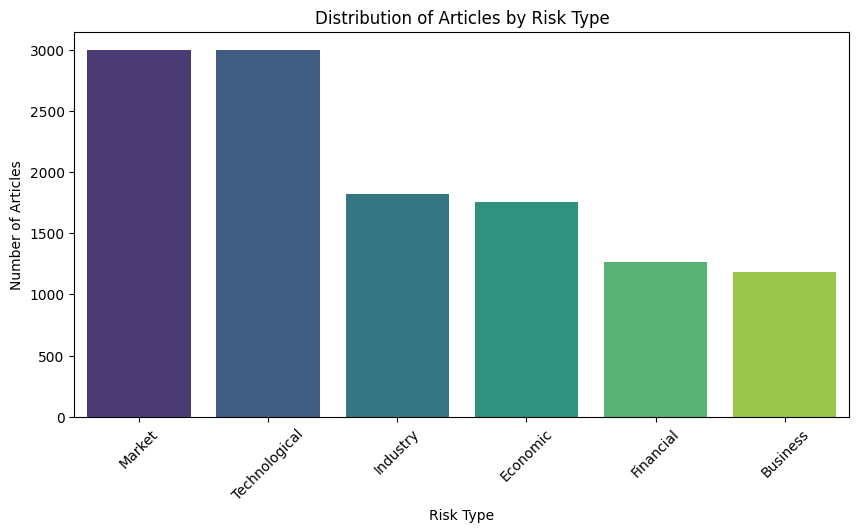

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('mapped_nytimes_dataset.csv')

# Check the distribution of risk types
risk_type_counts = df['risk_type'].value_counts()
print(risk_type_counts)

# Visualizing the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=risk_type_counts.index, y=risk_type_counts.values, palette='viridis')
plt.xlabel("Risk Type")
plt.ylabel("Number of Articles")
plt.title("Distribution of Articles by Risk Type")
plt.xticks(rotation=45)
plt.show()

## Manually labelling risk level

In [ ]:
df_sample = df[:500].copy()
df_sample['risk_level'] = ''  # Empty column for manual input
df_sample.to_csv('manual_labeling.csv', index=False)
print("CSV file 'manual_labeling.csv' has been created. You can now label the data manually.")

CSV file 'manual_labeling.csv' has been created. You can now label the data manually.


In [ ]:
## import manually labeled data - 690 rows
import pandas as pd

labeled_df = pd.read_csv('manual_labeling.csv')
labeled_df.head()

,section,headline,abstract,full_text,risk_type,risk_level
0,Real Estate,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Finding something affordable doesn’t automatic...,Market,Low
1,Economy,China Moves to Steady Its Slowing Economic Growth,The country's central bank will in effect inje...,HONG KONG — China on Wednesday moved to pump m...,Economic,High
2,Real Estate,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",A 19th-Century Stone House in Spain $1.7 MILLI...,Market,Medium
3,Real Estate,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,The people who sit on co-op boards in New York...,Market,Low
4,Real Estate,The Year Ended With Another Big Sale at 220 Ce...,A sprawling duplex there sold for $92.7 millio...,The final month of 2019 ended almost the same ...,Market,High


In [ ]:
labeled_df_industry = pd.read_csv('manual_labeling_industry.csv')
labeled_df_industry.head()

,section,headline,abstract,full_text,risk_type,risk_level
0,Automobiles,German Automakers Are Charged Up and Ready to ...,"As Tesla completes a factory in Berlin, Merced...","HOCKENHEIM, Germany — The Porsche Taycan rocke...",Industry,Medium
1,Automobiles,"For Car Buyers Who Got a Lemon, State Laws Var...","New Jersey has the best, Illinois the worst, a...",Motorists who live in New Jersey and have a ma...,Industry,Low
2,Automobiles,Why Fiat Chrysler's Talks With Renault Fell Apart,The offer of a 50-50 merger appealed in an ind...,The proposed merger of Fiat Chrysler Automobil...,Industry,Medium
3,Automobiles,Flashing Your Headlights? You're Probably Send...,"There are no universally accepted, consistent ...","You’re driving on a winding, rural road at nig...",Industry,Low
4,Automobiles,Sale of Rare Nazi-Era Porsche Sputters After S...,"The bidding for the Porsche Type 64, built by ...","As the curtains parted, the frenzied car afici...",Industry,Low


In [ ]:
combined_df = pd.concat([labeled_df, labeled_df_industry], ignore_index=True)
combined_df = combined_df.drop_duplicates(subset='headline')
combined_df

,section,headline,abstract,full_text,risk_type,risk_level
0,Real Estate,"Bedminster, N.J.: Horses, Golf and Presidentia...","Residents of the Somerset County township, who...",Finding something affordable doesn’t automatic...,Market,Low
1,Economy,China Moves to Steady Its Slowing Economic Growth,The country's central bank will in effect inje...,HONG KONG — China on Wednesday moved to pump m...,Economic,High
2,Real Estate,House Hunting in Spain: A Historic Estate For ...,"In Galicia, where the climate and the housing ...",A 19th-Century Stone House in Spain $1.7 MILLI...,Market,Medium
3,Real Estate,So You Want to Join Your Co-op Board?,Five new members thought it seemed like a good...,The people who sit on co-op boards in New York...,Market,Low
4,Real Estate,The Year Ended With Another Big Sale at 220 Ce...,A sprawling duplex there sold for $92.7 millio...,The final month of 2019 ended almost the same ...,Market,High
...,...,...,...,...,...,...
585,Automobiles,Risks Higher for Front-Seat Passengers in Some...,"The Toyota RAV4 got a ""poor"" passenger-side ra...","Of the seven, only a 2016 Hyundai Tucson earne...",Industry,Medium
586,Automobiles,When the Car's Gear Shifter Is Too Clever by Half,Automobile electronics have freed designers fr...,IF you are among the multitudes of drivers rec...,Industry,Medium
587,Automobiles,"Owner's Manual, Out of the Glove Box and Onto ...",Automakers are putting the owner's manual onli...,THE recent death of the actor Anton Yelchin ha...,Industry,High
588,Automobiles,Video Review: The New Audi Q7 Drops to Fightin...,The big three-row Audi S.U.V. that has been pr...,Whether it’s an upcoming high school reunion o...,Industry,Medium


In [ ]:
labeled_df_money = pd.read_csv('manual_labeling_money.csv')
labeled_df_money.head()

,section,headline,abstract,full_text,risk_type,risk_level
0,Your Money,When Sheltering in Place Puts Your Tax Strateg...,Advisers say taxpayers facing residency questi...,Lockdowns have disrupted the lives of millions...,Financial,Medium
1,Your Money,Pandemic Has Increased Money Anxiety. Therapis...,Interest in financial therapy rose after the 2...,Dale Mackey closed her event space in Knoxvill...,Financial,Medium
2,Your Money,Wealthy Fliers Worried About Coronavirus Turn ...,"As business executives curtail their travel, j...",Commercial air travel has plummeted in the pan...,Financial,Low
3,Your Money,Please Send Us Your College Applications About...,Did you apply for undergraduate admission for ...,"Some number of months ago, before things chang...",Financial,Low
4,Your Money,How a Tax Benefit for Developers Could Backfir...,As the coronavirus crisis pushes down real est...,Something remarkable is percolating in the com...,Financial,High


In [ ]:
labeled_df_final = pd.concat([labeled_df_money, combined_df], ignore_index=True)
labeled_df_final = labeled_df_final.drop_duplicates(subset='headline')
labeled_df_final

,section,headline,abstract,full_text,risk_type,risk_level
0,Your Money,When Sheltering in Place Puts Your Tax Strateg...,Advisers say taxpayers facing residency questi...,Lockdowns have disrupted the lives of millions...,Financial,Medium
1,Your Money,Pandemic Has Increased Money Anxiety. Therapis...,Interest in financial therapy rose after the 2...,Dale Mackey closed her event space in Knoxvill...,Financial,Medium
2,Your Money,Wealthy Fliers Worried About Coronavirus Turn ...,"As business executives curtail their travel, j...",Commercial air travel has plummeted in the pan...,Financial,Low
3,Your Money,Please Send Us Your College Applications About...,Did you apply for undergraduate admission for ...,"Some number of months ago, before things chang...",Financial,Low
4,Your Money,How a Tax Benefit for Developers Could Backfir...,As the coronavirus crisis pushes down real est...,Something remarkable is percolating in the com...,Financial,High
...,...,...,...,...,...,...
685,Automobiles,Risks Higher for Front-Seat Passengers in Some...,"The Toyota RAV4 got a ""poor"" passenger-side ra...","Of the seven, only a 2016 Hyundai Tucson earne...",Industry,Medium
686,Automobiles,When the Car's Gear Shifter Is Too Clever by Half,Automobile electronics have freed designers fr...,IF you are among the multitudes of drivers rec...,Industry,Medium
687,Automobiles,"Owner's Manual, Out of the Glove Box and Onto ...",Automakers are putting the owner's manual onli...,THE recent death of the actor Anton Yelchin ha...,Industry,High
688,Automobiles,Video Review: The New Audi Q7 Drops to Fightin...,The big three-row Audi S.U.V. that has been pr...,Whether it’s an upcoming high school reunion o...,Industry,Medium


In [ ]:
# Export the DataFrame to CSV
labeled_df_final.to_csv('/content/labeled_df_final.csv', index=False)

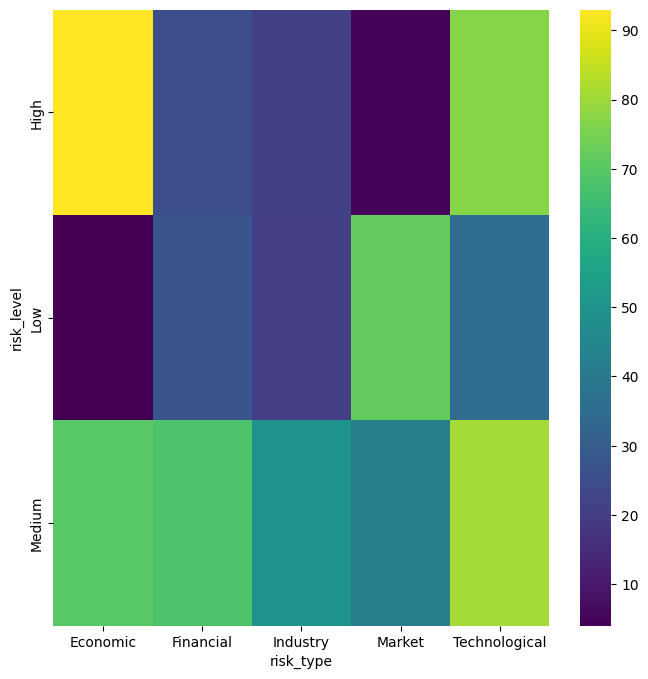

In [ ]:
# @title risk_type vs risk_level

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['risk_level'].value_counts()
    for x_label, grp in labeled_df_final.groupby('risk_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('risk_type')
_ = plt.ylabel('risk_level')

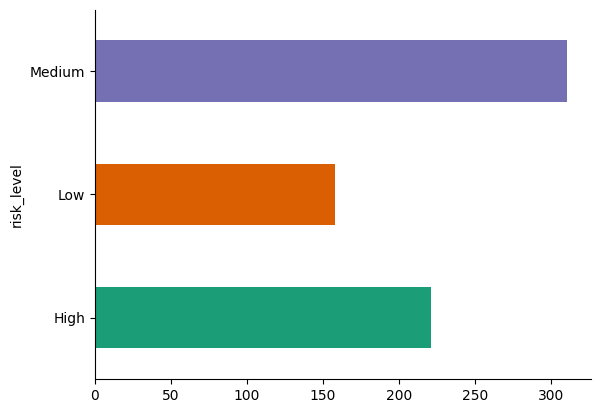

In [ ]:
# @title risk_level

from matplotlib import pyplot as plt
import seaborn as sns
labeled_df_final.groupby('risk_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

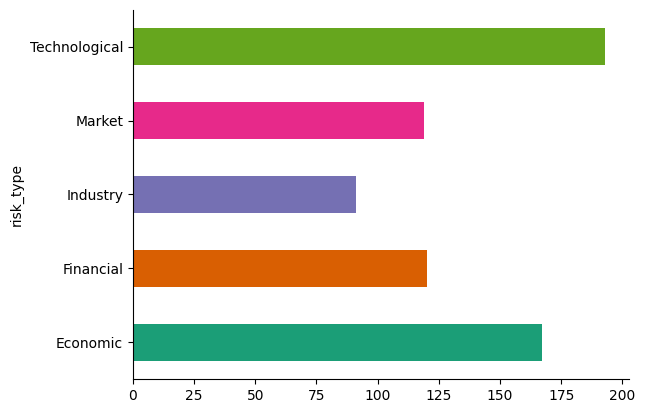

In [ ]:
# @title risk_type

from matplotlib import pyplot as plt
import seaborn as sns
labeled_df_final.groupby('risk_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Model training

## Train models for risk level classification

### BERT (baseline)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
# Train Models for Risk Type & Risk Level Classification
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
import re
import numpy as np
from transformers import EarlyStoppingCallback

In [ ]:
## import manually labeled data - 690 rows

labeled_df_final = pd.read_csv('labeled_df_final.csv')
labeled_df_final.head()

,section,headline,abstract,full_text,risk_type,risk_level
0,Your Money,When Sheltering in Place Puts Your Tax Strateg...,Advisers say taxpayers facing residency questi...,Lockdowns have disrupted the lives of millions...,Financial,Medium
1,Your Money,Pandemic Has Increased Money Anxiety. Therapis...,Interest in financial therapy rose after the 2...,Dale Mackey closed her event space in Knoxvill...,Financial,Medium
2,Your Money,Wealthy Fliers Worried About Coronavirus Turn ...,"As business executives curtail their travel, j...",Commercial air travel has plummeted in the pan...,Financial,Low
3,Your Money,Please Send Us Your College Applications About...,Did you apply for undergraduate admission for ...,"Some number of months ago, before things chang...",Financial,Low
4,Your Money,How a Tax Benefit for Developers Could Backfir...,As the coronavirus crisis pushes down real est...,Something remarkable is percolating in the com...,Financial,High


In [ ]:
risk_level_mapping = {'High': 0, 'Medium': 1, 'Low': 2}
labeled_df_final['risk_level'] = labeled_df_final['risk_level'].map(risk_level_mapping)

In [ ]:
# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

In [ ]:
# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)

In [ ]:
# Check for missing values
print(labeled_df_final[['headline', 'abstract', 'full_text']].isnull().sum())

headline     0
abstract     0
full_text    0
dtype: int64


In [ ]:
# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
def tokenize_function(examples):
    combined_texts = [
        a + ' ' + f
        for a, f in zip(examples['abstract'], examples['full_text'])
    ]
    return tokenizer(combined_texts, padding='max_length', truncation=True, max_length=512)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(labeled_df_final)
tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/690 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset = tokenized_dataset.add_column("labels", dataset["risk_level"])

In [ ]:
split_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=123, shuffle=True)
train_dataset = split_dataset["train"]
val_dataset = split_dataset["test"]

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3  # for High, Medium, Low
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_names = labeled_df_final['risk_level'].unique()
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labeled_df_final['risk_level']), y=labeled_df_final['risk_level'])
class_weights = torch.tensor(class_weights, dtype=torch.float)


In [ ]:
from transformers import Trainer
import torch.nn as nn
import torch

class WeightedLossTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights.to(self.args.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labeled_df_final['risk_level']),
    y=labeled_df_final['risk_level']
)
class_weights = torch.tensor(class_weights, dtype=torch.float)


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    logging_dir="./logs",
    load_best_model_at_end=True,
    logging_steps=500,
    logging_strategy="epoch"
)


trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
    class_weights=class_weights
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-33-7c443f1ee3ba>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedLossTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.077000,1.011423,0.478261,0.506176,0.478261,0.418229
2,0.961100,0.910860,0.521739,0.663114,0.521739,0.442679
3,0.866300,0.836462,0.507246,0.516184,0.507246,0.469036
4,0.797800,0.811577,0.586957,0.636106,0.586957,0.565508
5,0.745500,0.774822,0.623188,0.656443,0.623188,0.611992
6,0.695400,0.746608,0.601449,0.621332,0.601449,0.589745
7,0.654100,0.738725,0.608696,0.633415,0.608696,0.596551
8,0.612200,0.728131,0.615942,0.631579,0.615942,0.608493
9,0.585000,0.733814,0.615942,0.647831,0.615942,0.604186
10,0.561500,0.729254,0.637681,0.667977,0.637681,0.626912


TrainOutput(global_step=690, training_loss=0.755602352861045, metrics={'train_runtime': 598.8271, 'train_samples_per_second': 9.218, 'train_steps_per_second': 1.152, 'total_flos': 1452386065858560.0, 'train_loss': 0.755602352861045, 'epoch': 10.0})

maybe run smaller bert model?

Accuracy and F1 Score are steadily improving — especially from Epoch 1 to 9.

Your precision and recall are balanced, which is great — no class is disproportionately favored.

Validation loss stopped improving after around Epoch 9, indicating an optimal point there.

From Epoch 9 → 10, validation loss slightly increased while F1 decreased slightly. This may suggest early signs of overfitting.

If the pattern continues in further epochs, you risk training past the point of generalization.

The model is learning well, especially from Epochs 1 to 7.

The best balance is likely around Epoch 9 where:

Train loss is lowest

Validation loss is near lowest

F1, Accuracy, and other metrics peak

In [ ]:
import pandas as pd

# Manually define the results
data = {
    'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Training Loss': [1.049100, 0.893000, 0.808400, 0.706000, 0.605600, 0.530900, 0.485200, 0.427900, 0.396600, 0.363600],
    'Validation Loss': [0.906242, 0.869435, 0.812660, 0.842475, 0.780999, 0.881460, 0.774891, 0.774131, 0.780353, 0.831094],
    'Accuracy': [0.492754, 0.557971, 0.550725, 0.586957, 0.630435, 0.565217, 0.652174, 0.652174, 0.666667, 0.652174],
    'Precision': [0.669581, 0.632282, 0.593174, 0.609045, 0.633184, 0.616563, 0.665807, 0.660043, 0.670671, 0.666430],
    'Recall': [0.492754, 0.557971, 0.550725, 0.586957, 0.630435, 0.565217, 0.652174, 0.652174, 0.666667, 0.652174],
    'F1': [0.398039, 0.535589, 0.515871, 0.585392, 0.628450, 0.557383, 0.653791, 0.653050, 0.666210, 0.651239]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('training_results.csv', index=False)

# Display the DataFrame
df


,Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
0,1,1.0491,0.906242,0.492754,0.669581,0.492754,0.398039
1,2,0.8930,0.869435,0.557971,0.632282,0.557971,0.535589
2,3,0.8084,0.812660,0.550725,0.593174,0.550725,0.515871
3,4,0.7060,0.842475,0.586957,0.609045,0.586957,0.585392
4,5,0.6056,0.780999,0.630435,0.633184,0.630435,0.628450
5,6,0.5309,0.881460,0.565217,0.616563,0.565217,0.557383
6,7,0.4852,0.774891,0.652174,0.665807,0.652174,0.653791
7,8,0.4279,0.774131,0.652174,0.660043,0.652174,0.653050
8,9,0.3966,0.780353,0.666667,0.670671,0.666667,0.666210
9,10,0.3636,0.831094,0.652174,0.666430,0.652174,0.651239


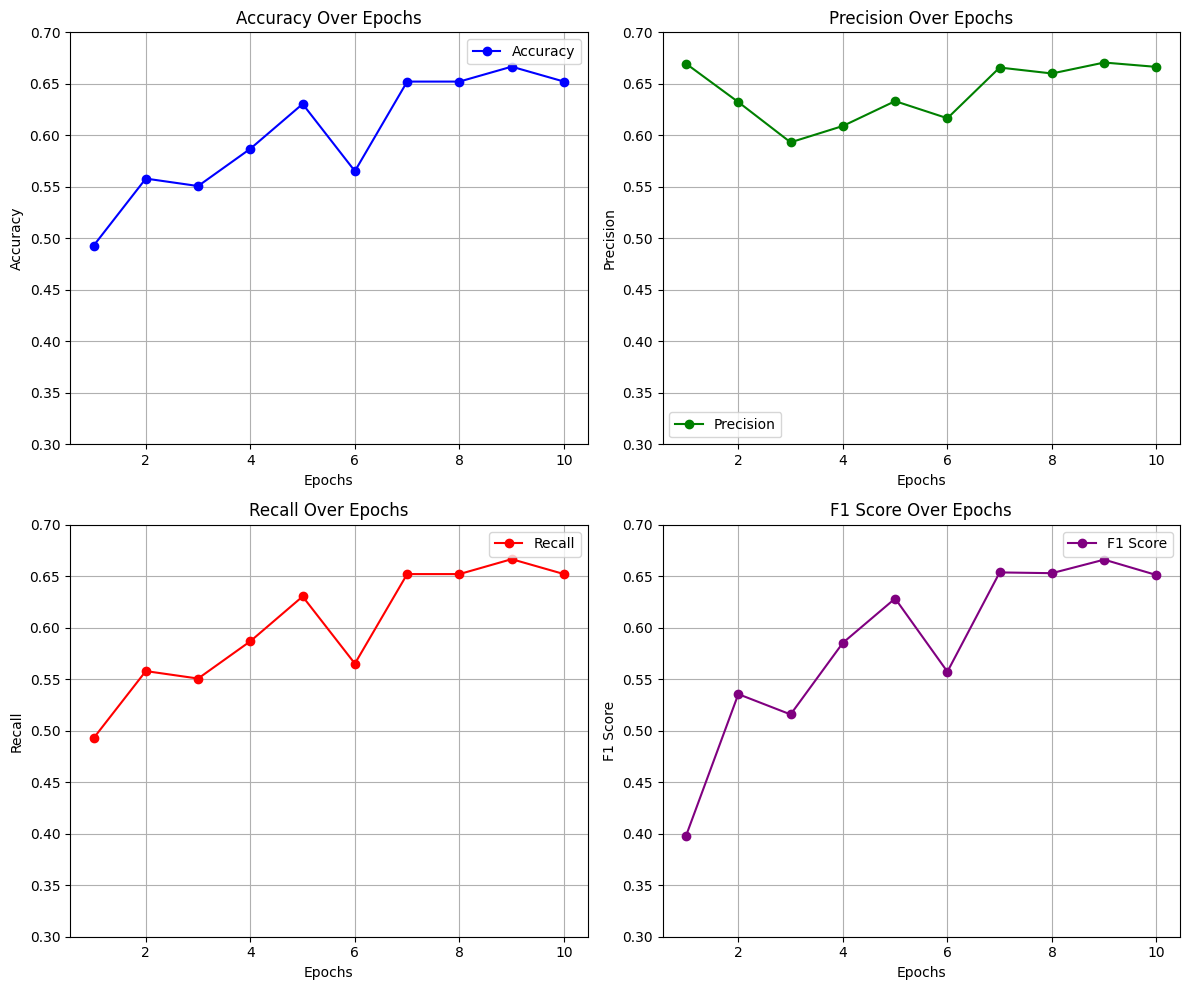

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Accuracy in the first subplot (top left)
axes[0, 0].plot(df['Epoch'], df['Accuracy'], marker='o', color='blue', linestyle='-', label='Accuracy')
axes[0, 0].set_title('Accuracy Over Epochs')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0.3, 0.7)
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot Precision in the second subplot (top right)
axes[0, 1].plot(df['Epoch'], df['Precision'], marker='o', color='green', linestyle='-', label='Precision')
axes[0, 1].set_title('Precision Over Epochs')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_ylim(0.3, 0.7)
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot Recall in the third subplot (bottom left)
axes[1, 0].plot(df['Epoch'], df['Recall'], marker='o', color='red', linestyle='-', label='Recall')
axes[1, 0].set_title('Recall Over Epochs')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_ylim(0.3, 0.7)
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot F1 Score in the fourth subplot (bottom right)
axes[1, 1].plot(df['Epoch'], df['F1'], marker='o', color='purple', linestyle='-', label='F1 Score')
axes[1, 1].set_title('F1 Score Over Epochs')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_ylim(0.3, 0.7)
axes[1, 1].grid(True)
axes[1, 1].legend()

# Adjust the layout so plots do not overlap
plt.tight_layout()

# Show the plots
plt.show()

# Save the figure if needed
fig.savefig('training_metrics_separate_plots.png')


### DeBERTa-v3

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
import re
import numpy as np
from transformers import EarlyStoppingCallback

In [ ]:
## import manually labeled data - 690 rows

labeled_df_final = pd.read_csv('labeled_df_final.csv')
labeled_df_final.head()

risk_level_mapping = {'High': 0, 'Medium': 1, 'Low': 2}
labeled_df_final['risk_level'] = labeled_df_final['risk_level'].map(risk_level_mapping)

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)

In [ ]:
# Convert the pandas dataframe to Hugging Face Dataset
dataset = Dataset.from_pandas(labeled_df_final)

# Load the FinBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")

model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=3)  # Adjust num_labels as needed

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
for name, _ in model.named_parameters():
    print(name)

deberta.embeddings.word_embeddings.weight
deberta.embeddings.LayerNorm.weight
deberta.embeddings.LayerNorm.bias
deberta.encoder.layer.0.attention.self.query_proj.weight
deberta.encoder.layer.0.attention.self.query_proj.bias
deberta.encoder.layer.0.attention.self.key_proj.weight
deberta.encoder.layer.0.attention.self.key_proj.bias
deberta.encoder.layer.0.attention.self.value_proj.weight
deberta.encoder.layer.0.attention.self.value_proj.bias
deberta.encoder.layer.0.attention.output.dense.weight
deberta.encoder.layer.0.attention.output.dense.bias
deberta.encoder.layer.0.attention.output.LayerNorm.weight
deberta.encoder.layer.0.attention.output.LayerNorm.bias
deberta.encoder.layer.0.intermediate.dense.weight
deberta.encoder.layer.0.intermediate.dense.bias
deberta.encoder.layer.0.output.dense.weight
deberta.encoder.layer.0.output.dense.bias
deberta.encoder.layer.0.output.LayerNorm.weight
deberta.encoder.layer.0.output.LayerNorm.bias
deberta.encoder.layer.1.attention.self.query_proj.weight
d

In [ ]:
for name, param in model.named_parameters():
    if "layer.11" in name or "layer.10" in name:  # Unfreeze the last two layers
        param.requires_grad = True


In [ ]:
# Unfreeze last 4 layers
for name, param in model.named_parameters():
    if not any(f"layer.{i}" in name for i in [8, 9, 10, 11]):
        if "encoder.layer" in name or "embeddings" in name:
            param.requires_grad = False


In [ ]:
# Unfreeze more layers (or all layers) to allow more fine-tuning
for name, param in model.named_parameters():
    param.requires_grad = True  # Unfreeze all layers

In [ ]:
# Tokenization function
def tokenize_function(examples):
    combined_texts = [
        a + ' ' + f
        for a, f in zip(examples['abstract'], examples['full_text'])
    ]
    return tokenizer(combined_texts, padding='max_length', truncation=True, max_length=512)

# Tokenizing the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/690 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset = tokenized_dataset.add_column("labels", dataset["risk_level"])

split_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=123, shuffle=True)
train_dataset = split_dataset["train"]
val_dataset = split_dataset["test"]

In [ ]:
# Compute class weights for handling imbalanced data
labels = tokenized_dataset['labels']  # Adjust to your label column
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(tokenized_dataset['labels']),
    y=tokenized_dataset['labels']
)
class_weights = torch.tensor(class_weights, dtype=torch.float)

In [ ]:
from transformers import Trainer
import torch.nn as nn
import torch

class WeightedLossTrainer(Trainer):
    def __init__(self, *args, class_weights=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=self.class_weights.to(self.args.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [ ]:
# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./results',               # Directory to save results
    num_train_epochs=10,                   # Number of epochs
    per_device_train_batch_size=8,        # Batch size for training
    per_device_eval_batch_size=8,         # Batch size for evaluation
    evaluation_strategy="epoch",          # Evaluate at the end of each epoch
    logging_dir='./logs',                 # Directory for logs
    logging_steps=500,                    # Log every 500 steps
    save_steps=1000,                      # Save model every 1000 steps
    weight_decay=0.01,                    # Weight decay for regularization
    learning_rate=1e-4,
    warmup_steps=100,
    max_grad_norm=1.0,
    lr_scheduler_type="linear",
    logging_first_step=True
)

# Set up Trainer with the subclassed WeightedLossTrainer
trainer = WeightedLossTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    class_weights=class_weights
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-70-7c443f1ee3ba>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `WeightedLossTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


In [ ]:
# Fine-tune the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.078800,1.013411,0.398551,0.446658,0.398551,0.335929
2,1.078800,0.793787,0.601449,0.656058,0.601449,0.589822
3,1.078800,0.935750,0.543478,0.718939,0.543478,0.442937
4,1.078800,0.725243,0.695652,0.720497,0.695652,0.690417
5,1.078800,0.888088,0.652174,0.708468,0.652174,0.637049
6,1.078800,0.976052,0.695652,0.723249,0.695652,0.694324
7,1.078800,1.358315,0.702899,0.715389,0.702899,0.702202
8,0.665500,1.489669,0.724638,0.734394,0.724638,0.723195
9,0.665500,1.536199,0.717391,0.720962,0.717391,0.716677
10,0.665500,1.563154,0.731884,0.734495,0.731884,0.731844


TrainOutput(global_step=690, training_loss=0.5133999306222666, metrics={'train_runtime': 645.8144, 'train_samples_per_second': 8.547, 'train_steps_per_second': 1.068, 'total_flos': 1452412112486400.0, 'train_loss': 0.5133999306222666, 'epoch': 10.0})

### T5 model

In [ ]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
from datasets import Dataset
import pandas as pd

# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df_final = pd.read_csv("labeled_df_final.csv")

# Convert the risk level into text labels
risk_level_mapping = {'High': 'High', 'Medium': 'Medium', 'Low': 'Low'}
labeled_df_final['risk_level'] = labeled_df_final['risk_level'].map(risk_level_mapping)

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)

# Convert to Hugging Face Dataset format
dataset = Dataset.from_pandas(labeled_df_final)

In [ ]:
from transformers import T5Tokenizer

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Tokenization function
def tokenize_function(examples):
    # Combine 'abstract' and 'full_text' columns (adjust these to match your dataset)
    combined_texts = [
        'classify: ' + a + ' ' + f
        for a, f in zip(examples['abstract'], examples['full_text'])
    ]

    # Tokenize the input text (encoder input)
    model_inputs = tokenizer(combined_texts, padding='max_length', truncation=True, max_length=512)

    # Tokenize the labels (decoder input)
    labels = tokenizer(examples['risk_level'], padding='max_length', truncation=True, max_length=2)  # max_length=2 for label tokens

    # Add the labels as the decoder input
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/690 [00:00<?, ? examples/s]

In [ ]:
# Split into training and validation sets (80% training, 20% validation)
train_dataset = tokenized_dataset.train_test_split(test_size=0.2)['train']
val_dataset = tokenized_dataset.train_test_split(test_size=0.2)['test']

In [ ]:
from transformers import T5ForConditionalGeneration

# Load the T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Adjust the number of labels for the classification task
model.config.num_labels = 3  # Change to match your task, e.g., 3 (High, Medium, Low)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Check if predictions is a tuple and extract logits
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    # Convert logits to predicted token IDs if needed
    if isinstance(predictions[0][0], (list, np.ndarray)):
        predictions = np.argmax(predictions, axis=-1)

    # Decode predictions and labels (make sure each is a list of token IDs)
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Strip whitespace and standardize labels/preds
    decoded_preds = [pred.strip().lower() for pred in decoded_preds]
    decoded_labels = [label.strip().lower() for label in decoded_labels]

    # Compute metrics
    accuracy = accuracy_score(decoded_labels, decoded_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        decoded_labels, decoded_preds, average='weighted', zero_division=0
    )

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",             # Where to store the final model and logs
    evaluation_strategy="epoch",        # Evaluate after each epoch
    learning_rate=1e-4,                 # Learning rate
    per_device_train_batch_size=4,      # Batch size for training
    per_device_eval_batch_size=4,       # Batch size for evaluation
    num_train_epochs=10,                 # Number of training epochs
    weight_decay=0.01,                  # Weight decay for optimization
    logging_dir='./logs',               # Directory for storing logs
    save_steps=1000,                    # Save checkpoint every 1000 steps
    logging_steps=50,                   # Log every 100 steps
    lr_scheduler_type="linear",         # Learning rate scheduler type
    warmup_steps=200,                   # Number of warmup steps
    max_grad_norm=1.0,                  # Maximum gradient norm for gradient clipping
)

# Define the Trainer
trainer = Trainer(
    model=model,                        # The model to train
    args=training_args,                 # The training arguments
    train_dataset=train_dataset,        # The training dataset
    eval_dataset=val_dataset,           # The evaluation dataset
    tokenizer=tokenizer,                # The tokenizer
    compute_metrics=compute_metrics
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-85-c74057aacb8b>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Start training
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.284800,0.337222,0.717391,0.749283,0.717391,0.706068
2,0.155500,0.287385,0.789855,0.802103,0.789855,0.791149
3,0.139400,0.246978,0.811594,0.820100,0.811594,0.814862
4,0.131900,0.211782,0.840580,0.840338,0.840580,0.840400
5,0.112900,0.217932,0.862319,0.864922,0.862319,0.862704
6,0.148500,0.220456,0.869565,0.871343,0.869565,0.869315
7,0.111500,0.225949,0.876812,0.882887,0.876812,0.879696
8,0.111600,0.218802,0.876812,0.876345,0.876812,0.876501
9,0.088000,0.223609,0.876812,0.876345,0.876812,0.876501
10,0.062700,0.219808,0.876812,0.876345,0.876812,0.876501


TrainOutput(global_step=1380, training_loss=0.14210245332856108, metrics={'train_runtime': 229.4068, 'train_samples_per_second': 24.062, 'train_steps_per_second': 6.016, 'total_flos': 747086744125440.0, 'train_loss': 0.14210245332856108, 'epoch': 10.0})

using training, validation and testing dataset

In [ ]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
import re
import numpy as np
from transformers import EarlyStoppingCallback

In [ ]:
from datasets import Dataset
import pandas as pd

# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df_final = pd.read_csv("labeled_df_final.csv")

# Convert the risk level into text labels
risk_level_mapping = {'High': 'High', 'Medium': 'Medium', 'Low': 'Low'}
labeled_df_final['risk_level'] = labeled_df_final['risk_level'].map(risk_level_mapping)

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified train/val/test split
train_val_df, test_df = train_test_split(labeled_df_final, test_size=0.15, stratify=labeled_df_final['risk_level'], random_state=130)
train_df, val_df = train_test_split(train_val_df, test_size=0.15, stratify=train_val_df['risk_level'], random_state=130)

# Convert the pandas DataFrames back to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess(example):
    input_text = example['abstract'] + ' ' + example['full_text']
    target_text = example['risk_level']
    model_input = tokenizer(input_text, padding='max_length', truncation=True, max_length=512)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(target_text, padding='max_length', truncation=True, max_length=10)
    model_input["labels"] = labels["input_ids"]
    return model_input

train_dataset = train_dataset.map(preprocess, batched=False)
val_dataset = val_dataset.map(preprocess, batched=False)
test_dataset = test_dataset.map(preprocess, batched=False)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/498 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/88 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

In [ ]:
from transformers import T5ForConditionalGeneration

# Load the T5 model
t5modelsmall = T5ForConditionalGeneration.from_pretrained("t5-small")

# Adjust the number of labels for the classification task
t5modelsmall.config.num_labels = 3  # Change to match your task, e.g., 3 (High, Medium, Low)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# Freeze all encoder layers
for param in t5modelsmall.encoder.parameters():
    param.requires_grad = False

# Unfreeze the last 2 layers of both encoder and decoder
for param in t5modelsmall.encoder.block[-2:].parameters():
    param.requires_grad = True

for param in t5modelsmall.decoder.block[-2:].parameters():
    param.requires_grad = True

# UNFREEZE lm_head (so the model can learn to generate "High", "Medium", etc.)
for param in t5modelsmall.lm_head.parameters():
    param.requires_grad = True

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Check if predictions is a tuple and extract logits
    if isinstance(predictions, tuple):
        predictions = predictions[0]

    # Convert logits to predicted token IDs if needed
    if isinstance(predictions[0][0], (list, np.ndarray)):
        predictions = np.argmax(predictions, axis=-1)

    # Decode predictions and labels (make sure each is a list of token IDs)
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Strip whitespace and standardize labels/preds
    decoded_preds = [pred.strip().lower() for pred in decoded_preds]
    decoded_labels = [label.strip().lower() for label in decoded_labels]

    # Compute metrics
    accuracy = accuracy_score(decoded_labels, decoded_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        decoded_labels, decoded_preds, average='weighted', zero_division=0
    )

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",             # Where to store the final model and logs
    evaluation_strategy="epoch",        # Evaluate after each epoch
    learning_rate=1e-4,                 # Learning rate
    per_device_train_batch_size=4,      # Batch size for training
    per_device_eval_batch_size=4,       # Batch size for evaluation
    num_train_epochs=10,                 # Number of training epochs
    weight_decay=0.01,                  # Weight decay for optimization
    logging_dir='./logs',               # Directory for storing logs
    save_steps=1000,                    # Save checkpoint every 1000 steps
    logging_steps=50,                   # Log every 100 steps
    lr_scheduler_type="linear",         # Learning rate scheduler type
    warmup_steps=200,                   # Number of warmup steps
    max_grad_norm=1.0,                  # Maximum gradient norm for gradient clipping
)

# Define the Trainer
trainer = Trainer(
    model=t5modelsmall,                 # The model to train
    args=training_args,                 # The training arguments
    train_dataset=train_dataset,        # The training dataset
    eval_dataset=val_dataset,           # The evaluation dataset
    compute_metrics=compute_metrics
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,19.203100,10.707249,0.000000,0.000000,0.000000,0.000000
2,2.071200,0.882634,0.000000,0.000000,0.000000,0.000000
3,0.699700,0.174933,0.511364,0.420638,0.511364,0.455995
4,0.178900,0.102049,0.522727,0.535811,0.522727,0.497210
5,0.148800,0.095667,0.579545,0.594368,0.579545,0.562615
6,0.118800,0.092159,0.556818,0.572116,0.556818,0.530366
7,0.129000,0.090583,0.568182,0.586580,0.568182,0.545811
8,0.139800,0.091960,0.545455,0.545899,0.545455,0.509647
9,0.116100,0.088410,0.590909,0.595603,0.590909,0.574236
10,0.109100,0.088893,0.590909,0.595335,0.590909,0.569815


TrainOutput(global_step=1250, training_loss=2.628981119155884, metrics={'train_runtime': 202.3778, 'train_samples_per_second': 24.607, 'train_steps_per_second': 6.177, 'total_flos': 674002171330560.0, 'train_loss': 2.628981119155884, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.10666093230247498, 'eval_accuracy': 0.5288461538461539, 'eval_precision': 0.5363425274415986, 'eval_recall': 0.5288461538461539, 'eval_f1': 0.48827436790851425, 'eval_runtime': 1.539, 'eval_samples_per_second': 67.576, 'eval_steps_per_second': 16.894, 'epoch': 10.0}


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,11.112800,1.026960,0.000000,0.000000,0.000000,0.000000
2,0.140200,0.104292,0.465909,0.453247,0.465909,0.402619
3,0.121400,0.097212,0.511364,0.552706,0.511364,0.498648
4,0.110700,0.091122,0.534091,0.644697,0.534091,0.471278
5,0.112500,0.086300,0.602273,0.605090,0.602273,0.599996
6,0.097300,0.081622,0.625000,0.676139,0.625000,0.606084
7,0.100100,0.078896,0.647727,0.676227,0.647727,0.639401
8,0.088600,0.077237,0.659091,0.679746,0.659091,0.654526
9,0.095000,0.075837,0.625000,0.637968,0.625000,0.622870
10,0.090800,0.075700,0.636364,0.650902,0.636364,0.633394


TrainOutput(global_step=1250, training_loss=1.5564847816467284, metrics={'train_runtime': 166.0271, 'train_samples_per_second': 29.995, 'train_steps_per_second': 7.529, 'total_flos': 674002171330560.0, 'train_loss': 1.5564847816467284, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.10517670214176178, 'eval_accuracy': 0.49038461538461536, 'eval_precision': 0.48866545606096684, 'eval_recall': 0.49038461538461536, 'eval_f1': 0.46956804106245337, 'eval_runtime': 1.5079, 'eval_samples_per_second': 68.972, 'eval_steps_per_second': 17.243, 'epoch': 10.0}


In [ ]:
trainer.train()
# decoder and 1e-4 learning rate

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,8.758500,0.953463,0.000000,0.000000,0.000000,0.000000
2,0.130900,0.094435,0.545455,0.549544,0.545455,0.539475
3,0.115900,0.089708,0.534091,0.545926,0.534091,0.514144
4,0.095100,0.079545,0.579545,0.589400,0.579545,0.573775
5,0.090700,0.079305,0.625000,0.646509,0.625000,0.608658
6,0.077700,0.072156,0.647727,0.652007,0.647727,0.645976
7,0.079500,0.071590,0.647727,0.663904,0.647727,0.645012
8,0.064700,0.072274,0.659091,0.667803,0.659091,0.655647
9,0.068800,0.071939,0.659091,0.661157,0.659091,0.656277
10,0.061600,0.071969,0.659091,0.666290,0.659091,0.657085


TrainOutput(global_step=1250, training_loss=1.3909916831970215, metrics={'train_runtime': 176.2342, 'train_samples_per_second': 28.258, 'train_steps_per_second': 7.093, 'total_flos': 674002171330560.0, 'train_loss': 1.3909916831970215, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.11370588839054108, 'eval_accuracy': 0.5384615384615384, 'eval_precision': 0.5499511082138201, 'eval_recall': 0.5384615384615384, 'eval_f1': 0.5337744621126335, 'eval_runtime': 1.5088, 'eval_samples_per_second': 68.927, 'eval_steps_per_second': 17.232, 'epoch': 10.0}


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,15.028300,2.531091,0.000000,0.000000,0.000000,0.000000
2,0.508800,0.135967,0.477273,0.473776,0.477273,0.414601
3,0.139800,0.094819,0.522727,0.521882,0.522727,0.510344
4,0.113100,0.089228,0.522727,0.530356,0.522727,0.510711
5,0.113500,0.085987,0.590909,0.593875,0.590909,0.585984
6,0.098800,0.083031,0.579545,0.590217,0.579545,0.570789
7,0.105200,0.082014,0.568182,0.588590,0.568182,0.549490
8,0.095500,0.081797,0.579545,0.600522,0.579545,0.563619
9,0.095100,0.078897,0.613636,0.623623,0.613636,0.606339
10,0.087700,0.079221,0.579545,0.593893,0.579545,0.569125


TrainOutput(global_step=1250, training_loss=1.9204873550415038, metrics={'train_runtime': 175.9936, 'train_samples_per_second': 28.296, 'train_steps_per_second': 7.103, 'total_flos': 674002171330560.0, 'train_loss': 1.9204873550415038, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.10156261175870895, 'eval_accuracy': 0.5480769230769231, 'eval_precision': 0.5674873203719357, 'eval_recall': 0.5480769230769231, 'eval_f1': 0.5280931819393359, 'eval_runtime': 1.5089, 'eval_samples_per_second': 68.925, 'eval_steps_per_second': 17.231, 'epoch': 10.0}


4 layers

In [ ]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: theresa-sumarta (theresa-sumarta-ucb) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,20.189700,12.152164,0.000000,0.000000,0.000000,0.000000
2,2.158000,0.967034,0.000000,0.000000,0.000000,0.000000
3,0.889300,0.348291,0.170455,0.438843,0.170455,0.240144
4,0.213900,0.115689,0.488636,0.378788,0.488636,0.412889
5,0.161700,0.100070,0.556818,0.566991,0.556818,0.542614
6,0.126800,0.097213,0.511364,0.522727,0.511364,0.482904
7,0.140100,0.094942,0.522727,0.534718,0.522727,0.497370
8,0.143400,0.096001,0.488636,0.497312,0.488636,0.438244
9,0.121200,0.092481,0.545455,0.555263,0.545455,0.524334
10,0.112000,0.092341,0.556818,0.569464,0.556818,0.533269


TrainOutput(global_step=1250, training_loss=2.8146680458068847, metrics={'train_runtime': 205.6951, 'train_samples_per_second': 24.211, 'train_steps_per_second': 6.077, 'total_flos': 674002171330560.0, 'train_loss': 2.8146680458068847, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.11364399641752243, 'eval_accuracy': 0.4807692307692308, 'eval_precision': 0.4854750512645249, 'eval_recall': 0.4807692307692308, 'eval_f1': 0.4318333651460202, 'eval_runtime': 1.5895, 'eval_samples_per_second': 65.429, 'eval_steps_per_second': 16.357, 'epoch': 10.0}


### roberta model

In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
import re
import numpy as np
from transformers import EarlyStoppingCallback

In [ ]:
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df_final = pd.read_csv("labeled_df_final.csv")

# Encode labels
label_encoder = LabelEncoder()
labeled_df_final["label"] = label_encoder.fit_transform(labeled_df_final["risk_level"])

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified train/val/test split
train_val_df, test_df = train_test_split(labeled_df_final, test_size=0.15, stratify=labeled_df_final['label'], random_state=130)
train_df, val_df = train_test_split(train_val_df, test_size=0.15, stratify=train_val_df['label'], random_state=130)

# Convert the pandas DataFrames back to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def preprocess(example):
    # Handle list inputs by joining them into a string
    abstract = " ".join(example['abstract']) if isinstance(example['abstract'], list) else example['abstract']
    full_text = " ".join(example['full_text']) if isinstance(example['full_text'], list) else example['full_text']

    input_text = abstract + ' ' + full_text
    encoded = tokenizer(input_text, padding="max_length", truncation=True, max_length=512)
    encoded["labels"] = example["label"]  # Use pre-encoded label
    return encoded

train_dataset = train_dataset.map(preprocess, batched=False)
val_dataset = val_dataset.map(preprocess, batched=False)
test_dataset = test_dataset.map(preprocess, batched=False)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/498 [00:00<?, ? examples/s]

Map:   0%|          | 0/88 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
from transformers import RobertaForSequenceClassification

# num_labels should match your number of classes (= 3)
model_roberta = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./roberta-results",
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model_roberta,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-45-dda284ea36ba>:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.046700,0.806957,0.625000,0.659840,0.625000,0.602046
2,0.839600,0.643265,0.738636,0.758745,0.738636,0.733462
3,0.649000,0.736545,0.670455,0.697918,0.670455,0.650685
4,0.516200,0.657843,0.738636,0.748316,0.738636,0.740597
5,0.348500,0.828674,0.784091,0.797276,0.784091,0.783188
6,0.286900,1.120924,0.750000,0.747381,0.750000,0.748512
7,0.181900,1.323192,0.727273,0.721837,0.727273,0.723465
8,0.148700,1.331273,0.738636,0.739760,0.738636,0.739061
9,0.102500,1.551862,0.704545,0.710400,0.704545,0.705857
10,0.090000,1.582465,0.715909,0.723221,0.715909,0.717600


TrainOutput(global_step=1250, training_loss=0.421002417755127, metrics={'train_runtime': 591.8564, 'train_samples_per_second': 8.414, 'train_steps_per_second': 2.112, 'total_flos': 1310304820285440.0, 'train_loss': 0.421002417755127, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 2.400054693222046, 'eval_accuracy': 0.5576923076923077, 'eval_precision': 0.5661497653540094, 'eval_recall': 0.5576923076923077, 'eval_f1': 0.5556816065290641, 'eval_runtime': 3.1226, 'eval_samples_per_second': 33.305, 'eval_steps_per_second': 8.326, 'epoch': 10.0}


### Distilbert

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import re
import numpy as np
from transformers import EarlyStoppingCallback

In [ ]:
# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df_final = pd.read_csv("labeled_df_final.csv")

# Encode labels
label_encoder = LabelEncoder()
labeled_df_final["label"] = label_encoder.fit_transform(labeled_df_final["risk_level"])

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified train/val/test split
train_val_df, test_df = train_test_split(labeled_df_final, test_size=0.15, stratify=labeled_df_final['label'], random_state=130)
train_df, val_df = train_test_split(train_val_df, test_size=0.15, stratify=train_val_df['label'], random_state=130)

# Convert the pandas DataFrames back to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess(example):
    # Handle list inputs by joining them into a string
    abstract = " ".join(example['abstract']) if isinstance(example['abstract'], list) else example['abstract']
    full_text = " ".join(example['full_text']) if isinstance(example['full_text'], list) else example['full_text']

    input_text = abstract + ' ' + full_text
    encoded = tokenizer(input_text, padding="max_length", truncation=True, max_length=512)
    encoded["labels"] = example["label"]  # Use pre-encoded label
    return encoded

train_dataset = train_dataset.map(preprocess, batched=False)
val_dataset = val_dataset.map(preprocess, batched=False)
test_dataset = test_dataset.map(preprocess, batched=False)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/498 [00:00<?, ? examples/s]

Map:   0%|          | 0/88 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
model_distil = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)  # Change num_labels as per your task


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Unfreeze last 2 transformer layers (or however many you want)
for layer in model.distilbert.transformer.layer[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Unfreeze last 3 transformer layers (or however many you want)
for layer in model.distilbert.transformer.layer[-3:]:
    for param in layer.parameters():
        param.requires_grad = True

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(p):
    preds, labels = p
    preds = torch.argmax(torch.tensor(preds), axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",             # Where to store the final model and logs
    evaluation_strategy="epoch",
    logging_strategy="epoch",           # Evaluate after each epoch
    learning_rate=5e-6,                 # Learning rate
    per_device_train_batch_size=8,      # Batch size for training
    per_device_eval_batch_size=8,       # Batch size for evaluation
    num_train_epochs=10,                 # Number of training epochs
    weight_decay=0.1,                  # Weight decay for optimization
    logging_dir='./logs',               # Directory for storing logs
    save_steps=1000,                    # Save checkpoint every 1000 steps
    logging_steps=50,                   # Log every 100 steps
    lr_scheduler_type="linear",         # Learning rate scheduler type
    warmup_steps=200,                   # Number of warmup steps
    max_grad_norm=1.0,                  # Maximum gradient norm for gradient clipping
)

trainer = Trainer(
    model=model_distil,                         # The model to train
    #model=model,
    args=training_args,                  # The training arguments
    train_dataset=train_dataset,         # The training dataset
    eval_dataset=val_dataset,            # The evaluation dataset
    compute_metrics=compute_metrics      # Metrics to evaluate the model
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.107000,1.090391,0.511364,0.561341,0.511364,0.469875
2,1.071800,1.035323,0.454545,0.206612,0.454545,0.284091
3,1.020000,0.947184,0.545455,0.477273,0.545455,0.461722
4,0.937400,0.841775,0.590909,0.623186,0.590909,0.584812
5,0.853900,0.778264,0.693182,0.704226,0.693182,0.695066
6,0.772300,0.733611,0.647727,0.651787,0.647727,0.649312
7,0.724800,0.714790,0.647727,0.662928,0.647727,0.650899
8,0.661700,0.698705,0.670455,0.680434,0.670455,0.673521
9,0.624700,0.691819,0.670455,0.673148,0.670455,0.671355
10,0.605700,0.692535,0.670455,0.682556,0.670455,0.673498


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=630, training_loss=0.8379272158183749, metrics={'train_runtime': 255.5992, 'train_samples_per_second': 19.484, 'train_steps_per_second': 2.465, 'total_flos': 659699409899520.0, 'train_loss': 0.8379272158183749, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.9407888054847717, 'eval_accuracy': 0.5384615384615384, 'eval_precision': 0.5489236219246341, 'eval_recall': 0.5384615384615384, 'eval_f1': 0.5410026020491137, 'eval_runtime': 1.4901, 'eval_samples_per_second': 69.796, 'eval_steps_per_second': 8.724, 'epoch': 10.0}


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.117400,1.100965,0.318182,0.101240,0.318182,0.153605
2,1.083600,1.052500,0.465909,0.527168,0.465909,0.308271
3,1.033100,0.977420,0.465909,0.420677,0.465909,0.324692
4,0.969900,0.886949,0.579545,0.660176,0.579545,0.547569
5,0.883200,0.812534,0.647727,0.650857,0.647727,0.647262
6,0.809400,0.768874,0.613636,0.613619,0.613636,0.612666
7,0.757800,0.743785,0.602273,0.602792,0.602273,0.601493
8,0.704900,0.731397,0.602273,0.602792,0.602273,0.601493
9,0.674500,0.721641,0.625000,0.626474,0.625000,0.623747
10,0.653900,0.717442,0.625000,0.624437,0.625000,0.622963


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=630, training_loss=0.8687637389652313, metrics={'train_runtime': 255.5409, 'train_samples_per_second': 19.488, 'train_steps_per_second': 2.465, 'total_flos': 659699409899520.0, 'train_loss': 0.8687637389652313, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.9418143630027771, 'eval_accuracy': 0.47115384615384615, 'eval_precision': 0.4971761133603239, 'eval_recall': 0.47115384615384615, 'eval_f1': 0.47753124616054765, 'eval_runtime': 1.5047, 'eval_samples_per_second': 69.119, 'eval_steps_per_second': 8.64, 'epoch': 10.0}


In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.096700,1.091499,0.443182,0.339674,0.443182,0.381905
2,1.070700,1.049585,0.454545,0.206612,0.454545,0.284091
3,1.034200,0.971050,0.477273,0.394936,0.477273,0.385658
4,0.965400,0.871189,0.590909,0.654444,0.590909,0.571143
5,0.878800,0.789852,0.636364,0.634631,0.636364,0.632479
6,0.813000,0.748477,0.647727,0.643725,0.647727,0.640891
7,0.763800,0.720789,0.647727,0.650578,0.647727,0.648077
8,0.710700,0.706590,0.670455,0.670063,0.670455,0.665904
9,0.683900,0.695925,0.670455,0.670063,0.670455,0.665904
10,0.663200,0.693347,0.670455,0.670063,0.670455,0.665904


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=630, training_loss=0.8680373297797309, metrics={'train_runtime': 255.6586, 'train_samples_per_second': 19.479, 'train_steps_per_second': 2.464, 'total_flos': 659699409899520.0, 'train_loss': 0.8680373297797309, 'epoch': 10.0})

In [ ]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.116800,1.079832,0.397727,0.548030,0.397727,0.363111
2,1.041300,0.966885,0.454545,0.206612,0.454545,0.284091
3,0.937600,0.817525,0.625000,0.634640,0.625000,0.607883
4,0.823200,0.723296,0.693182,0.700644,0.693182,0.691778
5,0.688800,0.674555,0.693182,0.695465,0.693182,0.693151
6,0.570700,0.680801,0.681818,0.689394,0.681818,0.682931
7,0.458400,0.668290,0.693182,0.692815,0.693182,0.689225
8,0.353500,0.661119,0.681818,0.682359,0.681818,0.681955
9,0.284700,0.671117,0.693182,0.693436,0.693182,0.692469
10,0.251600,0.682368,0.704545,0.706268,0.704545,0.704164


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=630, training_loss=0.6526477813720704, metrics={'train_runtime': 255.8196, 'train_samples_per_second': 19.467, 'train_steps_per_second': 2.463, 'total_flos': 659699409899520.0, 'train_loss': 0.6526477813720704, 'epoch': 10.0})

### FinBERT

In [ ]:
# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df_final = pd.read_csv("labeled_df_final.csv")

# Encode labels
label_encoder = LabelEncoder()
labeled_df_final["label"] = label_encoder.fit_transform(labeled_df_final["risk_level"])

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified train/val/test split
train_val_df, test_df = train_test_split(labeled_df_final, test_size=0.15, stratify=labeled_df_final['label'], random_state=130)
train_df, val_df = train_test_split(train_val_df, test_size=0.15, stratify=train_val_df['label'], random_state=130)

# Convert the pandas DataFrames back to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Load tokenizer and model
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_), hidden_dropout_prob=0.3)

# Preprocessing function
def preprocess(example):
    input_text = example['abstract'] + ' ' + example['full_text']
    encoded = tokenizer(input_text, padding="max_length", truncation=True, max_length=512)
    encoded["label"] = example["label"]
    return encoded

# Apply preprocessing
train_dataset = train_dataset.map(preprocess, remove_columns=train_dataset.column_names)
val_dataset = val_dataset.map(preprocess, remove_columns=val_dataset.column_names)
test_dataset = test_dataset.map(preprocess, remove_columns=test_dataset.column_names)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/498 [00:00<?, ? examples/s]

Map:   0%|          | 0/88 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
# Freeze the first N transformer layers (here, we freeze the first 6 layers)
for param in model.bert.encoder.layer[:6].parameters():
    param.requires_grad = False

In [ ]:
# Freeze the first N transformer layers (here, we freeze the first 2 layers)
for param in model.bert.encoder.layer[:2].parameters():
    param.requires_grad = False

In [ ]:
# Compute metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), dim=1)
    labels = torch.tensor(p.label_ids)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=0)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.05,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Train not removing 6 layers
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.076300,1.145932,0.409091,0.404924,0.409091,0.402720
2,1.116500,0.965515,0.454545,0.436531,0.454545,0.404225
3,1.058000,0.880660,0.579545,0.587253,0.579545,0.572216
4,0.988600,0.853795,0.488636,0.515272,0.488636,0.477820
5,0.996900,0.829125,0.511364,0.525787,0.511364,0.508909
6,0.944800,0.811410,0.556818,0.582415,0.556818,0.547513


TrainOutput(global_step=378, training_loss=1.1968511752981357, metrics={'train_runtime': 328.1726, 'train_samples_per_second': 15.175, 'train_steps_per_second': 1.92, 'total_flos': 786182892171264.0, 'train_loss': 1.1968511752981357, 'epoch': 6.0})

In [ ]:
# Evaluate
eval_results = trainer.evaluate()
print("Validation Results:", eval_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

Validation Results: {'eval_loss': 0.8806602954864502, 'eval_accuracy': 0.5795454545454546, 'eval_precision': 0.5872534293586925, 'eval_recall': 0.5795454545454546, 'eval_f1': 0.572215663124754, 'eval_runtime': 2.5916, 'eval_samples_per_second': 33.956, 'eval_steps_per_second': 4.245, 'epoch': 6.0}
Test Results: {'eval_loss': 1.075823426246643, 'eval_accuracy': 0.5192307692307693, 'eval_precision': 0.5573250534188035, 'eval_recall': 0.5192307692307693, 'eval_f1': 0.517020735702534, 'eval_runtime': 3.021, 'eval_samples_per_second': 34.425, 'eval_steps_per_second': 4.303, 'epoch': 6.0}


In [ ]:
# Train 1e-6 learning rate and removing 2 layers
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,3.655000,3.417092,0.215909,0.213684,0.215909,0.214027
2,2.071800,2.471357,0.227273,0.225464,0.227273,0.226323
3,1.716100,1.943585,0.227273,0.229059,0.227273,0.227904
4,1.455200,1.662999,0.261364,0.253051,0.261364,0.256158
5,1.412800,1.501816,0.318182,0.310217,0.318182,0.313154
6,1.373000,1.388168,0.363636,0.359052,0.363636,0.359671
7,1.244100,1.337966,0.386364,0.379257,0.386364,0.378934
8,1.241900,1.299368,0.375000,0.361244,0.375000,0.362959
9,1.223000,1.278189,0.397727,0.388280,0.397727,0.387801
10,1.203800,1.274179,0.397727,0.388280,0.397727,0.387801


TrainOutput(global_step=630, training_loss=1.6596587771461124, metrics={'train_runtime': 527.2402, 'train_samples_per_second': 9.445, 'train_steps_per_second': 1.195, 'total_flos': 1310304820285440.0, 'train_loss': 1.6596587771461124, 'epoch': 10.0})

In [ ]:
# Evaluate
eval_results = trainer.evaluate()
print("Validation Results:", eval_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

Validation Results: {'eval_loss': 1.2781890630722046, 'eval_accuracy': 0.3977272727272727, 'eval_precision': 0.3882799531295772, 'eval_recall': 0.3977272727272727, 'eval_f1': 0.3878007302284137, 'eval_runtime': 2.5617, 'eval_samples_per_second': 34.352, 'eval_steps_per_second': 4.294, 'epoch': 10.0}
Test Results: {'eval_loss': 1.3292419910430908, 'eval_accuracy': 0.40384615384615385, 'eval_precision': 0.39289536550406123, 'eval_recall': 0.40384615384615385, 'eval_f1': 0.39521608092240407, 'eval_runtime': 3.0107, 'eval_samples_per_second': 34.543, 'eval_steps_per_second': 4.318, 'epoch': 10.0}


In [ ]:
# Train removing 6 layers
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.372800,1.494553,0.318182,0.285903,0.318182,0.296453
2,1.190900,1.109825,0.386364,0.353612,0.386364,0.346582
3,1.109500,0.953277,0.454545,0.457198,0.454545,0.454748
4,1.047800,0.949487,0.477273,0.481018,0.477273,0.455570
5,1.040500,0.962785,0.500000,0.496490,0.500000,0.465132
6,1.018900,0.890761,0.465909,0.489766,0.465909,0.439344
7,0.927100,0.885462,0.500000,0.542768,0.500000,0.475609
8,0.952600,0.897983,0.500000,0.558442,0.500000,0.467406
9,0.926500,0.874423,0.522727,0.587338,0.522727,0.508701
10,0.913600,0.871144,0.511364,0.576422,0.511364,0.492487


TrainOutput(global_step=630, training_loss=1.1500152466789124, metrics={'train_runtime': 468.524, 'train_samples_per_second': 10.629, 'train_steps_per_second': 1.345, 'total_flos': 1310304820285440.0, 'train_loss': 1.1500152466789124, 'epoch': 10.0})

In [ ]:
# Evaluate
eval_results = trainer.evaluate()
print("Validation Results:", eval_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

Validation Results: {'eval_loss': 0.874423086643219, 'eval_accuracy': 0.5227272727272727, 'eval_precision': 0.5873376623376624, 'eval_recall': 0.5227272727272727, 'eval_f1': 0.5087007290954659, 'eval_runtime': 2.6114, 'eval_samples_per_second': 33.699, 'eval_steps_per_second': 4.212, 'epoch': 10.0}
Test Results: {'eval_loss': 1.0455931425094604, 'eval_accuracy': 0.5096153846153846, 'eval_precision': 0.5137444808431848, 'eval_recall': 0.5096153846153846, 'eval_f1': 0.49464552863682026, 'eval_runtime': 3.0247, 'eval_samples_per_second': 34.383, 'eval_steps_per_second': 4.298, 'epoch': 10.0}


In [ ]:
# Train removing 6 layers, update weight decay from 0.01 to 0.05, learning rate increased from 5e-6 to 1e-5
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,2.372800,1.494514,0.318182,0.285903,0.318182,0.296453
2,1.190900,1.109798,0.386364,0.353612,0.386364,0.346582
3,1.109500,0.953266,0.454545,0.457198,0.454545,0.454748
4,1.047700,0.949451,0.477273,0.481018,0.477273,0.455570
5,1.040500,0.962742,0.500000,0.496490,0.500000,0.465132
6,1.018900,0.890724,0.465909,0.489766,0.465909,0.439344
7,0.927100,0.885421,0.500000,0.542768,0.500000,0.475609
8,0.952600,0.897930,0.500000,0.558442,0.500000,0.467406
9,0.926500,0.874372,0.522727,0.587338,0.522727,0.508701
10,0.913500,0.871096,0.511364,0.576422,0.511364,0.492487


TrainOutput(global_step=630, training_loss=1.149999291556222, metrics={'train_runtime': 466.4644, 'train_samples_per_second': 10.676, 'train_steps_per_second': 1.351, 'total_flos': 1310304820285440.0, 'train_loss': 1.149999291556222, 'epoch': 10.0})

In [ ]:
# Evaluate
eval_results = trainer.evaluate()
print("Validation Results:", eval_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

Validation Results: {'eval_loss': 0.8743724226951599, 'eval_accuracy': 0.5227272727272727, 'eval_precision': 0.5873376623376624, 'eval_recall': 0.5227272727272727, 'eval_f1': 0.5087007290954659, 'eval_runtime': 2.5568, 'eval_samples_per_second': 34.417, 'eval_steps_per_second': 4.302, 'epoch': 10.0}
Test Results: {'eval_loss': 1.0454983711242676, 'eval_accuracy': 0.5096153846153846, 'eval_precision': 0.5137444808431848, 'eval_recall': 0.5096153846153846, 'eval_f1': 0.49464552863682026, 'eval_runtime': 3.0062, 'eval_samples_per_second': 34.595, 'eval_steps_per_second': 4.324, 'epoch': 10.0}


In [ ]:
# Train removing 6 layers, update weight decay from 0.01 to 0.05
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.883500,0.884422,0.500000,0.557449,0.500000,0.468223
2,0.876000,0.923472,0.511364,0.592391,0.511364,0.451772
3,0.857000,0.810642,0.568182,0.578143,0.568182,0.569109
4,0.887300,0.943076,0.522727,0.607693,0.522727,0.487621
5,0.779400,0.892053,0.545455,0.574141,0.545455,0.532519
6,0.759500,0.889161,0.545455,0.604924,0.545455,0.529391


TrainOutput(global_step=378, training_loss=0.8404530015572038, metrics={'train_runtime': 282.7368, 'train_samples_per_second': 17.614, 'train_steps_per_second': 2.228, 'total_flos': 786182892171264.0, 'train_loss': 0.8404530015572038, 'epoch': 6.0})

In [ ]:
# Evaluate
eval_results = trainer.evaluate()
print("Validation Results:", eval_results)

test_results = trainer.evaluate(test_dataset)
print("Test Results:", test_results)

Validation Results: {'eval_loss': 0.8106416463851929, 'eval_accuracy': 0.5681818181818182, 'eval_precision': 0.5781434474616293, 'eval_recall': 0.5681818181818182, 'eval_f1': 0.5691090505946381, 'eval_runtime': 2.5647, 'eval_samples_per_second': 34.312, 'eval_steps_per_second': 4.289, 'epoch': 6.0}
Test Results: {'eval_loss': 1.0715574026107788, 'eval_accuracy': 0.5, 'eval_precision': 0.4976648351648352, 'eval_recall': 0.5, 'eval_f1': 0.49769358019978366, 'eval_runtime': 2.9905, 'eval_samples_per_second': 34.777, 'eval_steps_per_second': 4.347, 'epoch': 6.0}


## Plot all results

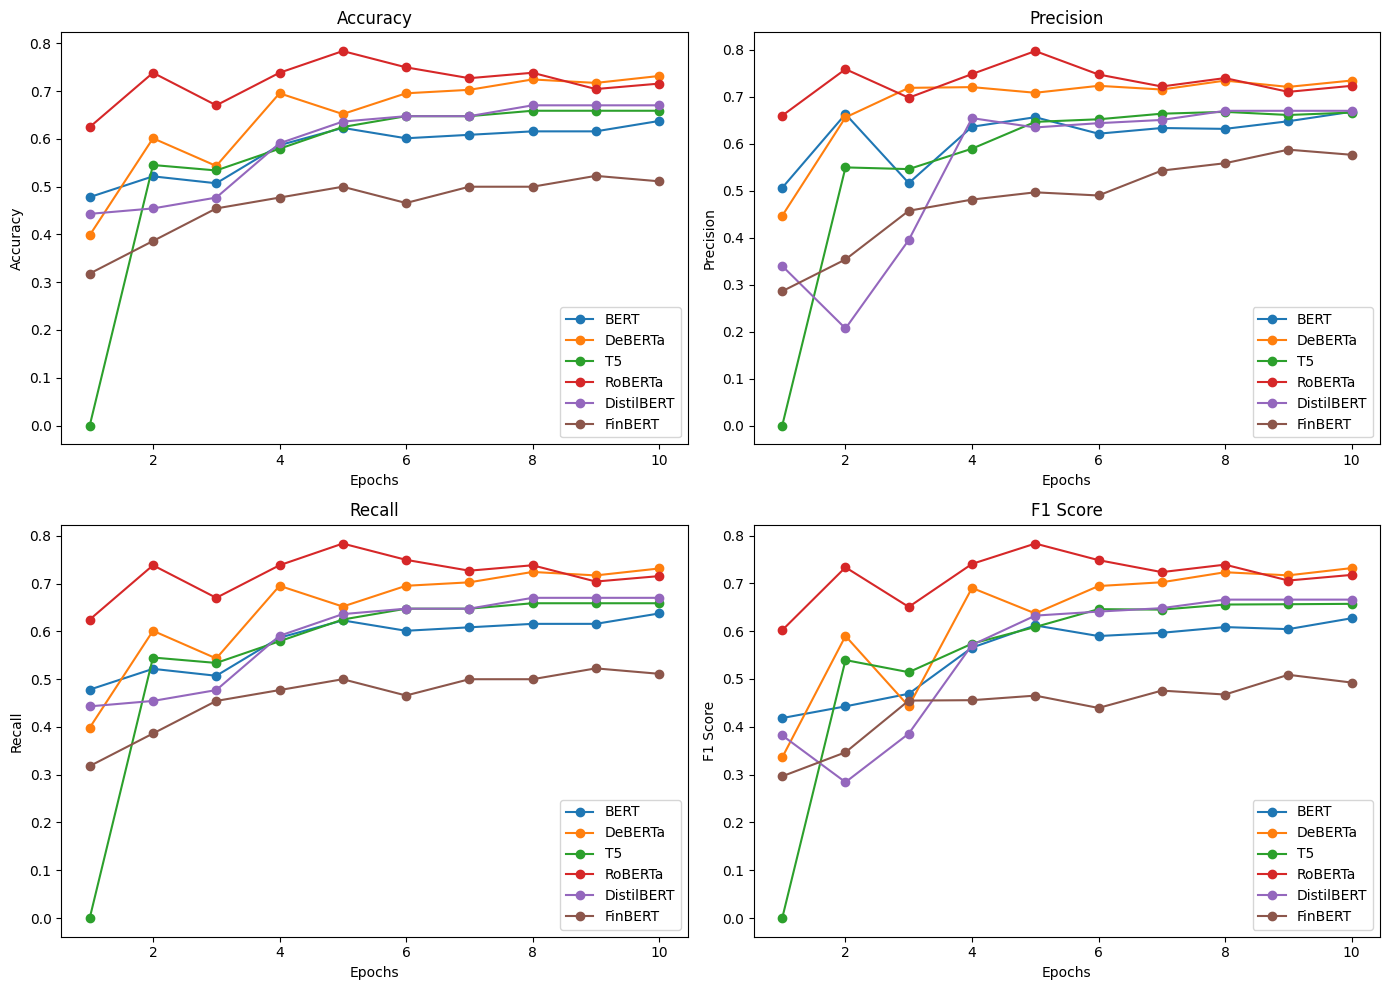

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for all models (BERT, DeBERTa, T5, RoBERTa, DistilBERT, FinBERT)
epochs = np.arange(1, 11)

# BERT Results
bert_accuracy = [0.478261, 0.521739, 0.507246, 0.586957, 0.623188, 0.601449, 0.608696, 0.615942, 0.615942, 0.637681]
bert_precision = [0.506176, 0.663114, 0.516184, 0.636106, 0.656443, 0.621332, 0.633415, 0.631579, 0.647831, 0.667977]
bert_recall = [0.478261, 0.521739, 0.507246, 0.586957, 0.623188, 0.601449, 0.608696, 0.615942, 0.615942, 0.637681]
bert_f1 = [0.418229, 0.442679, 0.469036, 0.565508, 0.611992, 0.589745, 0.596551, 0.608493, 0.604186, 0.626912]

# DeBERTa Results
deberta_accuracy = [0.398551, 0.601449, 0.543478, 0.695652, 0.652174, 0.695652, 0.702899, 0.724638, 0.717391, 0.731884]
deberta_precision = [0.446658, 0.656058, 0.718939, 0.720497, 0.708468, 0.723249, 0.715389, 0.734394, 0.720962, 0.734495]
deberta_recall = [0.398551, 0.601449, 0.543478, 0.695652, 0.652174, 0.695652, 0.702899, 0.724638, 0.717391, 0.731884]
deberta_f1 = [0.335929, 0.589822, 0.442937, 0.690417, 0.637049, 0.694324, 0.702202, 0.723195, 0.716677, 0.731844]

# T5 Results
t5_accuracy = [0.000000, 0.545455, 0.534091, 0.579545, 0.625000, 0.647727, 0.647727, 0.659091, 0.659091, 0.659091]
t5_precision = [0.000000, 0.549544, 0.545926, 0.589400, 0.646509, 0.652007, 0.663904, 0.667803, 0.661157, 0.666290]
t5_recall = [0.000000, 0.545455, 0.534091, 0.579545, 0.625000, 0.647727, 0.647727, 0.659091, 0.659091, 0.659091]
t5_f1 = [0.000000, 0.539475, 0.514144, 0.573775, 0.608658, 0.645976, 0.645012, 0.655647, 0.656277, 0.657085]

# RoBERTa Results
roberta_accuracy = [0.625000, 0.738636, 0.670455, 0.738636, 0.784091, 0.750000, 0.727273, 0.738636, 0.704545, 0.715909]
roberta_precision = [0.659840, 0.758745, 0.697918, 0.748316, 0.797276, 0.747381, 0.721837, 0.739760, 0.710400, 0.723221]
roberta_recall = [0.625000, 0.738636, 0.670455, 0.738636, 0.784091, 0.750000, 0.727273, 0.738636, 0.704545, 0.715909]
roberta_f1 = [0.602046, 0.733462, 0.650685, 0.740597, 0.783188, 0.748512, 0.723465, 0.739061, 0.705857, 0.717600]

# DistilBERT Results
distilbert_accuracy = [0.443182, 0.454545, 0.477273, 0.590909, 0.636364, 0.647727, 0.647727, 0.670455, 0.670455, 0.670455]
distilbert_precision = [0.339674, 0.206612, 0.394936, 0.654444, 0.634631, 0.643725, 0.650578, 0.670063, 0.670063, 0.670063]
distilbert_recall = [0.443182, 0.454545, 0.477273, 0.590909, 0.636364, 0.647727, 0.647727, 0.670455, 0.670455, 0.670455]
distilbert_f1 = [0.381905, 0.284091, 0.385658, 0.571143, 0.632479, 0.640891, 0.648077, 0.665904, 0.665904, 0.665904]

# FinBERT Results
finbert_accuracy = [0.318182, 0.386364, 0.454545, 0.477273, 0.500000, 0.465909, 0.500000, 0.500000, 0.522727, 0.511364]
finbert_precision = [0.285903, 0.353612, 0.457198, 0.481018, 0.496490, 0.489766, 0.542768, 0.558442, 0.587338, 0.576422]
finbert_recall = [0.318182, 0.386364, 0.454545, 0.477273, 0.500000, 0.465909, 0.500000, 0.500000, 0.522727, 0.511364]
finbert_f1 = [0.296453, 0.346582, 0.454748, 0.455570, 0.465132, 0.439344, 0.475609, 0.467406, 0.508701, 0.492487]

# Plotting

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axs[0, 0].plot(epochs, bert_accuracy, label='BERT', marker='o')
axs[0, 0].plot(epochs, deberta_accuracy, label='DeBERTa', marker='o')
axs[0, 0].plot(epochs, t5_accuracy, label='T5', marker='o')
axs[0, 0].plot(epochs, roberta_accuracy, label='RoBERTa', marker='o')
axs[0, 0].plot(epochs, distilbert_accuracy, label='DistilBERT', marker='o')
axs[0, 0].plot(epochs, finbert_accuracy, label='FinBERT', marker='o')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# Precision
axs[0, 1].plot(epochs, bert_precision, label='BERT', marker='o')
axs[0, 1].plot(epochs, deberta_precision, label='DeBERTa', marker='o')
axs[0, 1].plot(epochs, t5_precision, label='T5', marker='o')
axs[0, 1].plot(epochs, roberta_precision, label='RoBERTa', marker='o')
axs[0, 1].plot(epochs, distilbert_precision, label='DistilBERT', marker='o')
axs[0, 1].plot(epochs, finbert_precision, label='FinBERT', marker='o')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# Recall
axs[1, 0].plot(epochs, bert_recall, label='BERT', marker='o')
axs[1, 0].plot(epochs, deberta_recall, label='DeBERTa', marker='o')
axs[1, 0].plot(epochs, t5_recall, label='T5', marker='o')
axs[1, 0].plot(epochs, roberta_recall, label='RoBERTa', marker='o')
axs[1, 0].plot(epochs, distilbert_recall, label='DistilBERT', marker='o')
axs[1, 0].plot(epochs, finbert_recall, label='FinBERT', marker='o')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# F1 Score
axs[1, 1].plot(epochs, bert_f1, label='BERT', marker='o')
axs[1, 1].plot(epochs, deberta_f1, label='DeBERTa', marker='o')
axs[1, 1].plot(epochs, t5_f1, label='T5', marker='o')
axs[1, 1].plot(epochs, roberta_f1, label='RoBERTa', marker='o')
axs[1, 1].plot(epochs, distilbert_f1, label='DistilBERT', marker='o')
axs[1, 1].plot(epochs, finbert_f1, label='FinBERT', marker='o')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


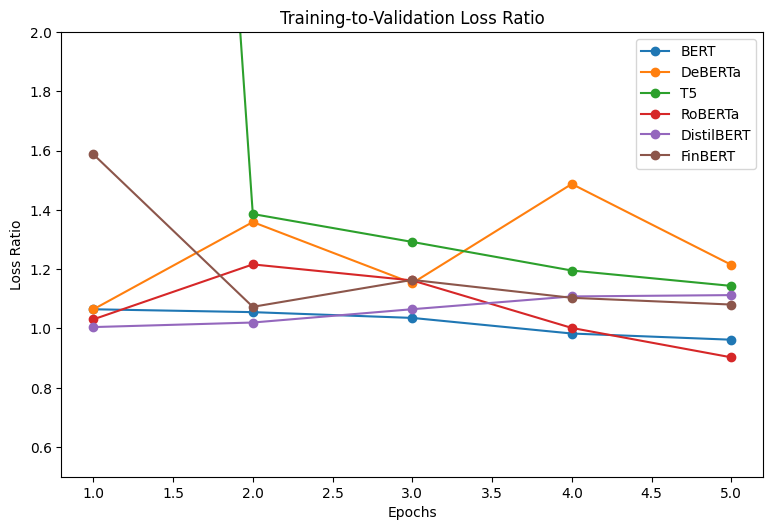

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Training and validation losses for all models
epochs = np.arange(1, 6)

# BERT Results
bert_train_loss = [1.077, 0.9611, 0.8663, 0.7978, 0.7455]
bert_val_loss = [1.011423, 0.91086, 0.836462, 0.811577, 0.774822]

# DeBERTa Results
deberta_train_loss = [1.0788, 1.0788, 1.0788, 1.0788, 1.0788]
deberta_val_loss = [1.013411, 0.793787, 0.93575, 0.725243, 0.888088]

# T5 Results
t5_train_loss = [8.7585, 0.1309, 0.1159, 0.0951, 0.0907]
t5_val_loss = [0.953463, 0.094435, 0.089708, 0.079545, 0.079305]

# RoBERTa Results
roberta_train_loss = [1.068100, 0.985300, 0.811300, 0.661200, 0.591000]
roberta_val_loss = [1.036250, 0.810169, 0.698107, 0.659961, 0.654730]

# DistilBERT Results
distilbert_train_loss = [1.0967, 1.0707, 1.0342, 0.9654, 0.8788]
distilbert_val_loss = [1.091499, 1.049585, 0.971050, 0.871189, 0.789852]

# FinBERT Results
finbert_train_loss = [2.372800, 1.190900, 1.109500, 1.047700, 1.040500]
finbert_val_loss = [1.494514, 1.109798, 0.953266, 0.949451, 0.962742]

# Calculate the training-to-validation loss ratio for each model
bert_loss_ratio = np.array(bert_train_loss) / np.array(bert_val_loss)
deberta_loss_ratio = np.array(deberta_train_loss) / np.array(deberta_val_loss)
t5_loss_ratio = np.array(t5_train_loss) / np.array(t5_val_loss)
roberta_loss_ratio = np.array(roberta_train_loss) / np.array(roberta_val_loss)
distilbert_loss_ratio = np.array(distilbert_train_loss) / np.array(distilbert_val_loss)
finbert_loss_ratio = np.array(finbert_train_loss) / np.array(finbert_val_loss)

# Plotting the metrics (accuracy, precision, recall, F1)
plt.figure(figsize=(15, 10))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs, bert_loss_ratio, label='BERT', marker='o')
plt.plot(epochs, deberta_loss_ratio, label='DeBERTa', marker='o')
plt.plot(epochs, t5_loss_ratio, label='T5', marker='o')
plt.plot(epochs, roberta_loss_ratio, label='RoBERTa', marker='o')
plt.plot(epochs, distilbert_loss_ratio, label='DistilBERT', marker='o')
plt.plot(epochs, finbert_loss_ratio, label='FinBERT', marker='o')
plt.title('Training-to-Validation Loss Ratio')
plt.xlabel('Epochs')
plt.ylabel('Loss Ratio')
plt.ylim(0.5, 2)
plt.legend()

plt.tight_layout()
plt.show()


## use best performing model to assign labels to the whole dataset

Train roberta model

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
import re
import numpy as np
from transformers import EarlyStoppingCallback

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df_final = pd.read_csv("labeled_df_final.csv")

# Encode labels
label_encoder = LabelEncoder()
labeled_df_final["label"] = label_encoder.fit_transform(labeled_df_final["risk_level"])

# Remove extra spaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.replace(r'\s+', ' ', regex=True)
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.replace(r'\s+', ' ', regex=True)

# Strip leading and trailing whitespaces
labeled_df_final['headline'] = labeled_df_final['headline'].str.strip()
labeled_df_final['abstract'] = labeled_df_final['abstract'].str.strip()
labeled_df_final['full_text'] = labeled_df_final['full_text'].str.strip()

# Remove URLs and email addresses
def remove_urls_and_emails(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    return text

labeled_df_final['headline'] = labeled_df_final['headline'].apply(remove_urls_and_emails)
labeled_df_final['abstract'] = labeled_df_final['abstract'].apply(remove_urls_and_emails)
labeled_df_final['full_text'] = labeled_df_final['full_text'].apply(remove_urls_and_emails)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform stratified train/val/test split
train_val_df, test_df = train_test_split(labeled_df_final, test_size=0.15, stratify=labeled_df_final['label'], random_state=130)
train_df, val_df = train_test_split(train_val_df, test_size=0.15, stratify=train_val_df['label'], random_state=130)

# Convert the pandas DataFrames back to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def preprocess(example):
    # Handle list inputs by joining them into a string
    abstract = " ".join(example['abstract']) if isinstance(example['abstract'], list) else example['abstract']
    full_text = " ".join(example['full_text']) if isinstance(example['full_text'], list) else example['full_text']

    input_text = abstract + ' ' + full_text
    encoded = tokenizer(input_text, padding="max_length", truncation=True, max_length=512)
    encoded["labels"] = example["label"]  # Use pre-encoded label
    return encoded

train_dataset = train_dataset.map(preprocess, batched=False)
val_dataset = val_dataset.map(preprocess, batched=False)
test_dataset = test_dataset.map(preprocess, batched=False)

# Set format for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/498 [00:00<?, ? examples/s]

Map:   0%|          | 0/88 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [ ]:
from transformers import RobertaForSequenceClassification

# num_labels should match your number of classes (= 3)
model_roberta = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./roberta-results",
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model_roberta,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-9-c10e196e0ba6>:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: theresa-sumarta (theresa-sumarta-ucb) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.068100,1.036250,0.454545,0.206612,0.454545,0.284091
2,0.985300,0.810169,0.579545,0.498908,0.579545,0.501010
3,0.811300,0.698107,0.715909,0.736003,0.715909,0.708012
4,0.661200,0.659961,0.738636,0.744184,0.738636,0.737692
5,0.591000,0.654730,0.750000,0.754132,0.750000,0.746928


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=315, training_loss=0.823356688968719, metrics={'train_runtime': 581.4009, 'train_samples_per_second': 4.283, 'train_steps_per_second': 0.542, 'total_flos': 655152410142720.0, 'train_loss': 0.823356688968719, 'epoch': 5.0})

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_roberta.to(device)

# Make predictions
preds, labels = [], []
model_roberta.eval()

with torch.no_grad():
    for batch in val_dataset:
        input_ids = batch['input_ids'].unsqueeze(0).to(device)
        attention_mask = batch['attention_mask'].unsqueeze(0).to(device)
        label = batch['label']  # keep this on CPU for now

        outputs = model_roberta(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        preds.append(logits.argmax(dim=-1).item())
        labels.append(label)

# Evaluate
print(confusion_matrix(labels, preds))
print(classification_report(labels, preds))


[[25  0  3]
 [ 1 15  4]
 [ 7  7 26]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.68      0.75      0.71        20
           2       0.79      0.65      0.71        40

    accuracy                           0.75        88
   macro avg       0.74      0.76      0.75        88
weighted avg       0.75      0.75      0.75        88



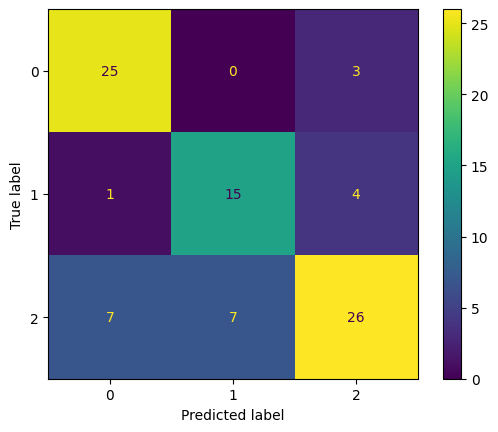

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

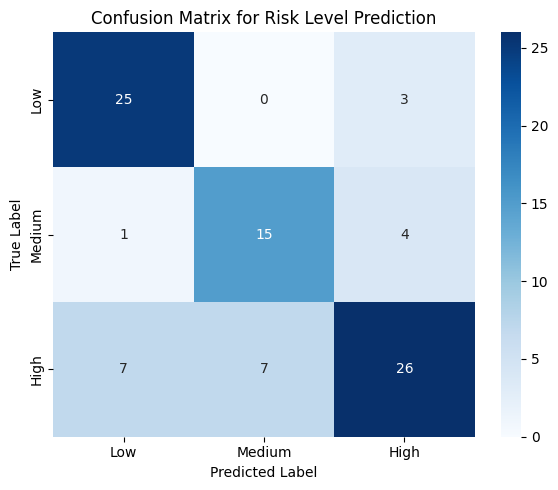

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Your confusion matrix
cm = np.array([[25, 0, 3],
               [1, 15, 4],
               [7, 7, 26]])

# Custom class labels
class_labels = ["Low", "Medium", "High"]

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Risk Level Prediction")
plt.tight_layout()
plt.show()


In [ ]:
#8e-6 freeze layers
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.072000,1.010826,0.454545,0.206612,0.454545,0.284091
2,0.921600,0.698598,0.681818,0.679281,0.681818,0.672550
3,0.758900,0.674571,0.693182,0.702712,0.693182,0.685093
4,0.681200,0.629226,0.727273,0.742145,0.727273,0.727174
5,0.646200,0.623209,0.727273,0.728675,0.727273,0.727066


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=625, training_loss=0.8159944946289063, metrics={'train_runtime': 257.5375, 'train_samples_per_second': 9.668, 'train_steps_per_second': 2.427, 'total_flos': 655152410142720.0, 'train_loss': 0.8159944946289063, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.9468214511871338, 'eval_accuracy': 0.5192307692307693, 'eval_precision': 0.5233368605079132, 'eval_recall': 0.5192307692307693, 'eval_f1': 0.519969961264888, 'eval_runtime': 3.193, 'eval_samples_per_second': 32.571, 'eval_steps_per_second': 8.143, 'epoch': 5.0}


In [ ]:
#1e-5 freeze 4 layers
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.061600,0.887758,0.511364,0.537240,0.511364,0.392058
2,0.860200,0.691265,0.727273,0.732268,0.727273,0.726262
3,0.684400,0.735108,0.727273,0.745220,0.727273,0.720968
4,0.566100,0.687674,0.750000,0.757070,0.750000,0.751653
5,0.501700,0.706122,0.738636,0.748316,0.738636,0.740597


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=625, training_loss=0.7348003784179687, metrics={'train_runtime': 269.3405, 'train_samples_per_second': 9.245, 'train_steps_per_second': 2.32, 'total_flos': 655152410142720.0, 'train_loss': 0.7348003784179687, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.9857739806175232, 'eval_accuracy': 0.5865384615384616, 'eval_precision': 0.5893166402078222, 'eval_recall': 0.5865384615384616, 'eval_f1': 0.5855914918414918, 'eval_runtime': 3.1909, 'eval_samples_per_second': 32.592, 'eval_steps_per_second': 8.148, 'epoch': 5.0}


In [ ]:
# 1e-5 without freezing any layers, weight decay from 0.01 to 0.1
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.045500,0.809136,0.670455,0.719008,0.670455,0.656886
2,0.828900,0.652757,0.738636,0.746506,0.738636,0.737604
3,0.643800,0.652830,0.715909,0.732667,0.715909,0.712056
4,0.492100,0.683810,0.727273,0.733676,0.727273,0.728888
5,0.388000,0.744985,0.704545,0.714641,0.704545,0.706690


TrainOutput(global_step=625, training_loss=0.6796681457519531, metrics={'train_runtime': 299.1789, 'train_samples_per_second': 8.323, 'train_steps_per_second': 2.089, 'total_flos': 655152410142720.0, 'train_loss': 0.6796681457519531, 'epoch': 5.0})

In [ ]:
# 1e-5 without freezing any layers, weight decay from 0.01 to 0.05
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.070400,0.949295,0.454545,0.206612,0.454545,0.284091
2,0.889600,0.664256,0.715909,0.715964,0.715909,0.712054
3,0.692000,0.695100,0.715909,0.722911,0.715909,0.708739
4,0.537600,0.667279,0.715909,0.722322,0.715909,0.717913
5,0.415800,0.697095,0.715909,0.722322,0.715909,0.717913


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=625, training_loss=0.7210896179199219, metrics={'train_runtime': 301.3236, 'train_samples_per_second': 8.264, 'train_steps_per_second': 2.074, 'total_flos': 655152410142720.0, 'train_loss': 0.7210896179199219, 'epoch': 5.0})

In [ ]:
# original model 4 epochs
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.053500,0.802317,0.670455,0.701091,0.670455,0.656607
2,0.826300,0.652403,0.738636,0.743792,0.738636,0.740031
3,0.644100,0.657092,0.727273,0.738911,0.727273,0.720615
4,0.501200,0.662946,0.715909,0.720328,0.715909,0.715963


TrainOutput(global_step=500, training_loss=0.7562792739868164, metrics={'train_runtime': 247.1943, 'train_samples_per_second': 8.058, 'train_steps_per_second': 2.023, 'total_flos': 524121928114176.0, 'train_loss': 0.7562792739868164, 'epoch': 4.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 1.0072230100631714, 'eval_accuracy': 0.5673076923076923, 'eval_precision': 0.5735392656124364, 'eval_recall': 0.5673076923076923, 'eval_f1': 0.5659615384615384, 'eval_runtime': 3.1313, 'eval_samples_per_second': 33.213, 'eval_steps_per_second': 8.303, 'epoch': 4.0}


In [ ]:
# increase 5 epochs
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.046400,0.813502,0.659091,0.710275,0.659091,0.641008
2,0.828000,0.647285,0.715909,0.729359,0.715909,0.714379
3,0.638700,0.658259,0.715909,0.732667,0.715909,0.712056
4,0.487100,0.709004,0.704545,0.714015,0.704545,0.706532
5,0.380400,0.754586,0.715909,0.726603,0.715909,0.718345


TrainOutput(global_step=625, training_loss=0.6761355102539063, metrics={'train_runtime': 304.6693, 'train_samples_per_second': 8.173, 'train_steps_per_second': 2.051, 'total_flos': 655152410142720.0, 'train_loss': 0.6761355102539063, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 1.227048635482788, 'eval_accuracy': 0.6153846153846154, 'eval_precision': 0.6224388070123855, 'eval_recall': 0.6153846153846154, 'eval_f1': 0.6137909641076391, 'eval_runtime': 3.1246, 'eval_samples_per_second': 33.284, 'eval_steps_per_second': 8.321, 'epoch': 5.0}


In [ ]:
# increase batch size
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.071000,1.033848,0.454545,0.206612,0.454545,0.284091
2,1.000800,0.854946,0.568182,0.551282,0.568182,0.475631
3,0.874600,0.721837,0.659091,0.654888,0.659091,0.647419
4,0.775600,0.661030,0.761364,0.760687,0.761364,0.758241


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=252, training_loss=0.9305111567179362, metrics={'train_runtime': 221.672, 'train_samples_per_second': 8.986, 'train_steps_per_second': 1.137, 'total_flos': 524121928114176.0, 'train_loss': 0.9305111567179362, 'epoch': 4.0})

In [ ]:
# increase no. of epochs
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.070500,1.021238,0.454545,0.206612,0.454545,0.284091
2,0.936100,0.685291,0.772727,0.772727,0.772727,0.772727
3,0.731200,0.650117,0.693182,0.711427,0.693182,0.681135
4,0.597300,0.590980,0.750000,0.748565,0.750000,0.748754
5,0.467300,0.626770,0.727273,0.739047,0.727273,0.719913
6,0.388100,0.592647,0.761364,0.759669,0.761364,0.759315
7,0.319000,0.598144,0.750000,0.750413,0.750000,0.748627


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=441, training_loss=0.6442075932647636, metrics={'train_runtime': 392.0811, 'train_samples_per_second': 8.891, 'train_steps_per_second': 1.125, 'total_flos': 917213374199808.0, 'train_loss': 0.6442075932647636, 'epoch': 7.0})

batches=8, no. of epochs = 4

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.057900,0.988642,0.454545,0.206612,0.454545,0.284091
2,0.923500,0.709903,0.727273,0.728675,0.727273,0.727066
3,0.739900,0.669819,0.715909,0.736532,0.715909,0.708545
4,0.628800,0.653057,0.704545,0.716348,0.704545,0.705244
5,0.544400,0.637420,0.727273,0.729823,0.727273,0.726065


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=315, training_loss=0.7788995167565724, metrics={'train_runtime': 289.4159, 'train_samples_per_second': 8.604, 'train_steps_per_second': 1.088, 'total_flos': 655152410142720.0, 'train_loss': 0.7788995167565724, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate(test_dataset)
print(metrics)

{'eval_loss': 0.943059504032135, 'eval_accuracy': 0.5384615384615384, 'eval_precision': 0.5461538461538461, 'eval_recall': 0.5384615384615384, 'eval_f1': 0.5402116435737517, 'eval_runtime': 2.8665, 'eval_samples_per_second': 36.281, 'eval_steps_per_second': 4.535, 'epoch': 5.0}


save Roberta Model

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

# Directory to save your model
save_directory = "./final_roberta_model"

# Save the model
model_roberta.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)


('./final_roberta_model/tokenizer_config.json',
 './final_roberta_model/special_tokens_map.json',
 './final_roberta_model/vocab.json',
 './final_roberta_model/merges.txt',
 './final_roberta_model/added_tokens.json')

In [ ]:
import joblib

joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
import json

# Load the config.json
with open('./config.json', 'r') as f:
    config = json.load(f)

# Print the config
print(json.dumps(config, indent=2))


{
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.50.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}


make unlabeled dataset and preprocess data

In [ ]:
# make unlabeled dataset (unlabeled_df)

import pandas as pd

# Load both datasets
labeled_df_final = pd.read_csv("labeled_df_final.csv")
full_df = pd.read_csv("mapped_nytimes_dataset.csv")

# Check initial number of rows in each file
print("Initial rows in labeled_df_final:", len(labeled_df_final))
print("Initial rows in mapped_nytimes_dataset:", len(full_df))

# Remove rows from full_df that have the same abstract as in labeled_df_final
unlabeled_df = full_df[~full_df['abstract'].isin(labeled_df_final['abstract'])]

# Check number of rows in the new dataframe
print("Rows in unlabeled_df after removal:", len(unlabeled_df))

Initial rows in labeled_df_final: 690
Initial rows in mapped_nytimes_dataset: 12013
Rows in unlabeled_df after removal: 11323


In [ ]:
# Save the resulting dataframe
unlabeled_df.to_csv("unlabeled_data.csv", index=False)

In [ ]:
# Load your unlabeled data
unlabeled_df = pd.read_csv("unlabeled_data.csv")

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\S+|\S+@\S+', '', text)
    return text.strip()

# Apply to both abstract and full_text
unlabeled_df['abstract'] = unlabeled_df['abstract'].apply(preprocess_text)
unlabeled_df['full_text'] = unlabeled_df['full_text'].apply(preprocess_text)

# Combine abstract and full_text for the model input
unlabeled_df['combined_text'] = unlabeled_df['abstract'] + " " + unlabeled_df['full_text']

load final Roberta Model

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

model_path = "./final_roberta_model"  # update filepath
tokenizer = RobertaTokenizer.from_pretrained(model_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [ ]:
from transformers import TextClassificationPipeline
import torch

# Prepare model pipeline
pipeline = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    return_all_scores=False,
    truncation=True,
    padding=True,
    device=0 if torch.cuda.is_available() else -1,
)

# Run predictions in batches
texts = unlabeled_df['combined_text'].tolist()
batch_size = 32
predicted_labels = []

for i in range(0, len(texts), batch_size):
    batch = texts[i:i+batch_size]
    preds = pipeline(batch)
    predicted_labels.extend([p['label'] for p in preds])


Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


save predictions

In [ ]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the label encoder used during training
label_encoder = joblib.load("label_encoder.pkl")  # or reinitialize if needed

# Convert to risk level names
predicted_risk_levels = label_encoder.inverse_transform(
    [int(label.split('_')[-1]) for label in predicted_labels]
)

# Add predictions to the DataFrame
unlabeled_df['predicted_risk_level'] = predicted_risk_levels


In [ ]:
unlabeled_df

,section,headline,abstract,full_text,risk_type,combined_text,predicted_risk_level
0,Economy,Pork Chops vs. People: Battling Coronavirus in...,"After President Trump's executive order, meat ...","On April 10, Tony Thompson, the sheriff for Bl...",Economic,"After President Trump's executive order, meat ...",High
1,Technology,Employers Rush to Adopt Virus Screening. The T...,Symptom-checking apps and fever-screening came...,Some law professors and bioethicists also warn...,Technological,Symptom-checking apps and fever-screening came...,High
2,Real Estate,A Dream Commute from Weehawken,Downsizing from a suburban family home in New ...,“We both grew up in apartments and lived in an...,Market,Downsizing from a suburban family home in New ...,Low
3,Economy,Reopening Prompts New Agitation Over Workers' ...,"As business restrictions are lifted, employees...","Riley Breakell, a Starbucks barista in Connect...",Economic,"As business restrictions are lifted, employees...",High
4,Real Estate,How the Virus May Change Your Next Home,Designers and architects expect the pandemic t...,More Flexible Spaces Working from home with th...,Market,Designers and architects expect the pandemic t...,Low
...,...,...,...,...,...,...,...
11318,Global Business,"For Sushi Chain, Conveyor Belts Carry Profit","The Kura ""revolving sushi"" chain has succeeded...","SAYAMA, Japan  The Kura “revolving sushi” res...",Business,"The Kura ""revolving sushi"" chain has succeeded...",Medium
11319,Automobiles,Clouds Parted to a Forecast of Sunnier Days,"For the automotive industry, 2010 played out l...",The tight credit that had crimped sales in 200...,Industry,"For the automotive industry, 2010 played out l...",Medium
11320,Automobiles,Jerry Garrett's Top 10 Cars of 2010,From a sleek European sedan to the last effort...,5. NISSAN LEAF This battery-electric car may n...,Industry,From a sleek European sedan to the last effort...,Low
11321,Automobiles,Lawrence Ulrich's Top 10 Cars of 2010,From the world's best sports car to an unexpec...,5. AUDI A8 By the high-flying standards of Aud...,Industry,From the world's best sports car to an unexpec...,Low


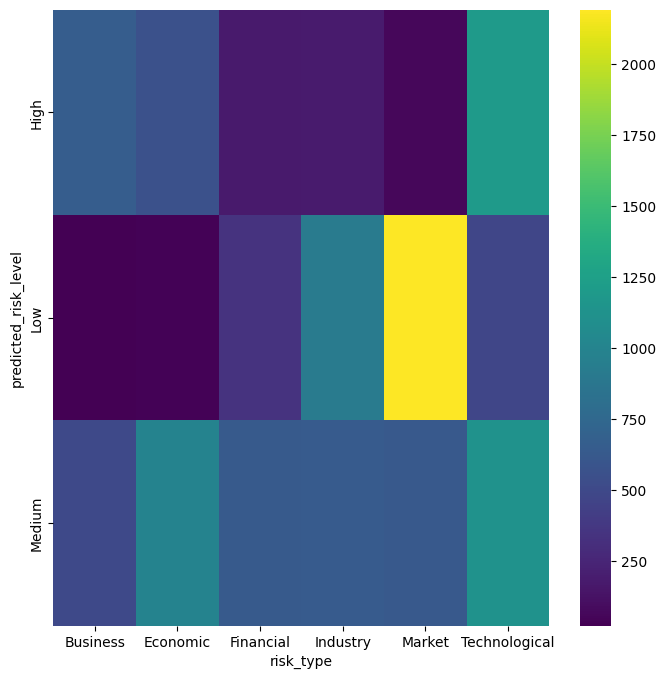

In [ ]:
# @title risk_type vs predicted_risk_level

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['predicted_risk_level'].value_counts()
    for x_label, grp in unlabeled_df.groupby('risk_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('risk_type')
_ = plt.ylabel('predicted_risk_level')

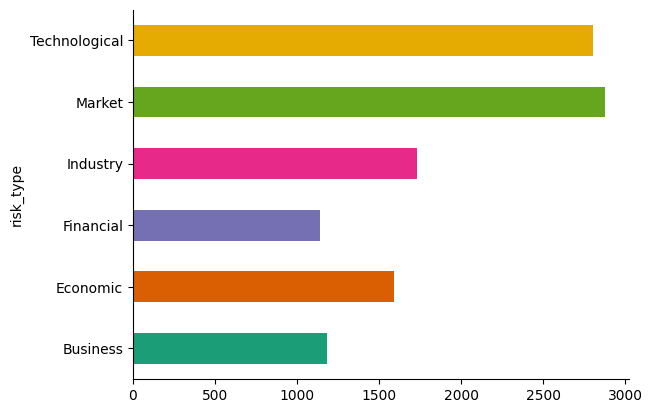

In [ ]:
# @title risk_type

from matplotlib import pyplot as plt
import seaborn as sns
unlabeled_df.groupby('risk_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

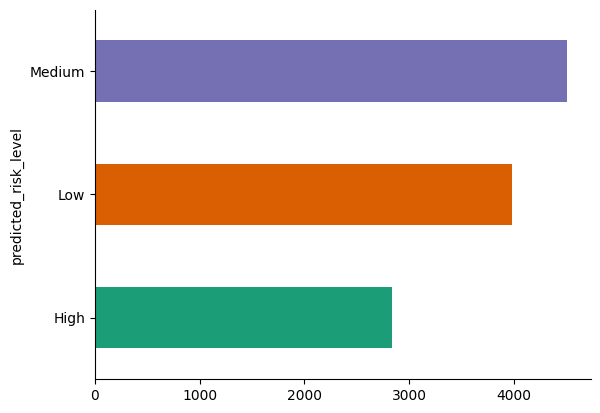

In [ ]:
# @title predicted_risk_level

from matplotlib import pyplot as plt
import seaborn as sns
unlabeled_df.groupby('predicted_risk_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Save results
unlabeled_df.to_csv("unlabeled_with_predictions.csv", index=False)

In [ ]:
# Assuming labeled_df_final has columns: 'text' (or 'headline', etc.) and 'risk_level'
labeled_df = pd.read_csv("labeled_df_final.csv")

# 1. Standardize column names
unlabeled_df = unlabeled_df.rename(columns={"predicted_risk_level": "risk_level"})

# 2. Optional: Add a flag to know which rows were originally labeled or predicted
labeled_df["source"] = "manual"
unlabeled_df["source"] = "predicted"

# Drop the 'combined_text' column
unlabeled_df = unlabeled_df.drop(columns=["combined_text"])

# 3. Ensure both have the same columns
labeled_df = labeled_df[unlabeled_df.columns]

# 4. Combine them
combined_df = pd.concat([labeled_df, unlabeled_df], ignore_index=True)


In [ ]:
combined_df

,section,headline,abstract,full_text,risk_type,risk_level,source
0,Your Money,When Sheltering in Place Puts Your Tax Strateg...,Advisers say taxpayers facing residency questi...,Lockdowns have disrupted the lives of millions...,Financial,Medium,manual
1,Your Money,Pandemic Has Increased Money Anxiety. Therapis...,Interest in financial therapy rose after the 2...,Dale Mackey closed her event space in Knoxvill...,Financial,Medium,manual
2,Your Money,Wealthy Fliers Worried About Coronavirus Turn ...,"As business executives curtail their travel, j...",Commercial air travel has plummeted in the pan...,Financial,Low,manual
3,Your Money,Please Send Us Your College Applications About...,Did you apply for undergraduate admission for ...,"Some number of months ago, before things chang...",Financial,Low,manual
4,Your Money,How a Tax Benefit for Developers Could Backfir...,As the coronavirus crisis pushes down real est...,Something remarkable is percolating in the com...,Financial,High,manual
...,...,...,...,...,...,...,...
12008,Global Business,"For Sushi Chain, Conveyor Belts Carry Profit","The Kura ""revolving sushi"" chain has succeeded...","SAYAMA, Japan  The Kura “revolving sushi” res...",Business,Medium,predicted
12009,Automobiles,Clouds Parted to a Forecast of Sunnier Days,"For the automotive industry, 2010 played out l...",The tight credit that had crimped sales in 200...,Industry,Medium,predicted
12010,Automobiles,Jerry Garrett's Top 10 Cars of 2010,From a sleek European sedan to the last effort...,5. NISSAN LEAF This battery-electric car may n...,Industry,Low,predicted
12011,Automobiles,Lawrence Ulrich's Top 10 Cars of 2010,From the world's best sports car to an unexpec...,5. AUDI A8 By the high-flying standards of Aud...,Industry,Low,predicted


In [ ]:
# Save to CSV
combined_df.to_csv("final_combined_dataset.csv", index=False)

## Q&A system

### Preprocess dataframe (data)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("final_combined_dataset.csv")

In [ ]:
# Fill NaNs with empty strings just in case
data[['headline', 'abstract', 'full_text']] = data[['headline', 'abstract', 'full_text']].fillna('')

# Create the combined_text column
data['combined_text'] = data['headline'] + '. ' + data['abstract'] + '. ' + data['full_text']


In [ ]:
data.head()

,section,headline,abstract,full_text,risk_type,risk_level,source,combined_text
0,Your Money,When Sheltering in Place Puts Your Tax Strateg...,Advisers say taxpayers facing residency questi...,Lockdowns have disrupted the lives of millions...,Financial,Medium,manual,When Sheltering in Place Puts Your Tax Strateg...
1,Your Money,Pandemic Has Increased Money Anxiety. Therapis...,Interest in financial therapy rose after the 2...,Dale Mackey closed her event space in Knoxvill...,Financial,Medium,manual,Pandemic Has Increased Money Anxiety. Therapis...
2,Your Money,Wealthy Fliers Worried About Coronavirus Turn ...,"As business executives curtail their travel, j...",Commercial air travel has plummeted in the pan...,Financial,Low,manual,Wealthy Fliers Worried About Coronavirus Turn ...
3,Your Money,Please Send Us Your College Applications About...,Did you apply for undergraduate admission for ...,"Some number of months ago, before things chang...",Financial,Low,manual,Please Send Us Your College Applications About...
4,Your Money,How a Tax Benefit for Developers Could Backfir...,As the coronavirus crisis pushes down real est...,Something remarkable is percolating in the com...,Financial,High,manual,How a Tax Benefit for Developers Could Backfir...


In [ ]:
import re

def clean_text_advanced(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"<.*?>", "", text)    # Remove HTML
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text)     # Remove extra whitespace
    return text.strip()

data['combined_text'] = data['combined_text'].apply(clean_text_advanced)

### FLAN-T5 (Large)

In [ ]:
pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 71.1 MB/s eta 0:00:00


In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, AutoTokenizer, AutoModelForSeq2SeqLM

# Load model and tokenizer
model_name_flan = "google/flan-t5-base"
tokenizer_flan = AutoTokenizer.from_pretrained(model_name_flan)
model_flan = AutoModelForSeq2SeqLM.from_pretrained(model_name_flan)


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load embedder model
embedder = SentenceTransformer('sentence-transformers/multi-qa-mpnet-base-dot-v1')

# Create embeddings for the combined text
embeddings = embedder.encode(data['combined_text'].tolist())

# Convert to numpy array
embeddings_np = np.array(embeddings)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# Create a FAISS index
index = faiss.IndexFlatL2(embeddings_np.shape[1])  # Use L2 distance
index.add(embeddings_np)


In [ ]:
# Encode the question
question = "Which economic risks have been reported for electric vehicle companies entering the US market?"
question_embedding = embedder.encode([question])

# Retrieve the most relevant rows
k = 5  # number of top results
D, I = index.search(np.array(question_embedding), k)

retrieved_contexts = [
    f"{row['combined_text']}\n\nRisk Type: {row['risk_type']}\nRisk Level: {row['risk_level']}"
    for _, row in data.iloc[I[0][:3]].iterrows()
]



In [ ]:
context = "\n\n".join(retrieved_contexts)

prompt = (
    f"You are a market risk assessment assistant.Given the context below, identify any market-entry risks for the specified product and country.\n\n"
    f"Context:\n{context}\n\n"
    f"Question: {question}\n\n"
    f"Respond with the Risk Type and Risk Level (High, Medium, Low). Be specific.\n"
    f"Answer:"
)


In [ ]:
inputs = tokenizer_flan(prompt, return_tensors="pt", truncation=True, max_length=1024)
outputs = model_flan.generate(**inputs, max_new_tokens=100)
answer = tokenizer_flan.decode(outputs[0], skip_special_tokens=True)

print(answer)


### GPT 2

In [ ]:
context = "wheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant which is in st petersburg builds the ford focus sales of the focus fell 27 percent in russia last year the wall street journal subscription required jesse jackson is meeting with japanese automakers as the head of rainbow push an organization that seeks to advance minority interests in the industry mr jackson told automotive news in an interview that rainbow push had been invited to the talks and that the organization was interested in examining issues related to management dealerships and suppliers automotive news subscription required hyundai announced the price of its allnew genesis sedan tuesday the 38liter v6equipped model will start at 38000 and the 5liter v8 version will start at 51500 not including a 950 destination charge the cars are expected to appear in dealership showrooms by the end of the month hyundai\n\nRisk Type: Industry\nRisk Level: Medium make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream toyota added a plugin version to its growing family of prius hybrids in 2012 it also added the extracapacity prius v wagon and the subcompact prius c rated at 53 mpg in city driving prius is now the no 1 selling line of cars in california it took 15 years for the prius to grow from an avantgarde experiment to a highvolume product line in 2012 toyota will sell more than one million hybrids globally startups run aground there were other ev reality checks in 2012 in october shai agassi the charismatic founder of better place a company formed to establish networks of ev batteryswapping stations stepped down from his chief executive role the californiabased company had opened quickswap stations in israel and denmark but is now reassessing its strategy despite the shakeup better place fared better than some electric car startups in january ener1 parent of the batterymaker enerdel filed for bankruptcy two months later azure dynamics which assembled the electric version of fords transit connect delivery vehicles filed for chapter 11 in october a123 systems one of the most promising united states battery companies and a supplier to fisker for the karma and gm for the chevrolet spark ev went bankrupt 545 mpg perhaps the biggest green car story of 2012 was the obama administrations new fuel economy standards on aug 28 rules were completed that established a standard of 545 miles per gallon as an average of all lightduty cars and trucks by 2025 essentially doubling fuel efficiency compared with todays vehicles that target also suggests that within a generation hybrids will be ubiquitous and evs common on american roads\n\nRisk Type: Industry\nRisk Level: Medium how green are electric cars depends on where you plug in a report found that recharging an electric vehicle in some parts of the united states will generate the same amount of greenhouse gases as driving many gaspowered cars the california part of the story is upbeat a hypothetical los angeles leaf would be accountable for the release of an admirably low level of greenhouse gases into the atmosphere about the same as a gasoline car getting 79 miles per gallon but the denver car would cause as large a load of greenhouse gases to enter the atmosphere as some versions of the gasolinepowered mazda 3 a compact sedan rated at 33 mpg in combined city and highway driving by the environmental protection agency in simple terms the effect of electric vehicles on the amount of greenhouse gases released into the environment can span a wide range varying with the source of the electricity that charges them californias clean power makes the leaf a hero the regional mix of coaldependent utilities serving denver diminish the cars benefits as a globalwarming fighter the ucs report which takes into account the full cycle of energy production often called a welltowheels analysis demonstrates that in areas where the electric utility relies on natural gas nuclear hydroelectric or renewable sources to power its generators the potential for electric cars and plugin hybrids to reduce carbon dioxide emissions is great but where generators are powered by burning a high percentage of coal electric cars may not be even as good as the latest gasoline models and far short of the thriftiest hybrids with gasoline hovering around 4 a gallon and massproduction evs like batterypowered versions of the ford focus and honda fit as well as plugin hybrids like the chevrolet volt toyota prius phv and ford fusion energi models either on sale now or coming soon the report arrives at an ideal time its analysis can help shoppers make informed decisions it also fills a gap many of the existing studies on electriccar efficiency were completed before models like the leaf came to market others have expressed their results in sciencelab terms like pounds of carbon dioxide emissions per year not especially useful to consumers automakers have not always helped their customers understand the issues either typically painting electrics and hybrids with a green brush and an idealistic setting the attempt to forge a simple message has created mistaken impressions too during a discussion with business leaders and journalists at the french consulate in new york early this month the chief executive of nissan and renault carlos ghosn doubled down in declaring an environmental edge for electrics over the best gasoline models\n\nRisk Type: Industry\nRisk Level: Medium"

In [ ]:
question = 'Which economic risks have been reported for electric vehicle companies entering the US market?'

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2-large")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-large")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
prompt = f"""
You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.
Please include:
- Risk Type (e.g., Economic, Political, Technological)
- Risk Level (e.g., Low, Medium, High)


Context:
{context}

Question:
{question}

Answer (include Risk Type and Risk Level):
"""

In [ ]:
# Explicitly set the model to CPU
model.to("cpu")


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1280)
    (wpe): Embedding(1024, 1280)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-35): 36 x GPT2Block(
        (ln_1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=3840, nx=1280)
          (c_proj): Conv1D(nf=1280, nx=1280)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=5120, nx=1280)
          (c_proj): Conv1D(nf=1280, nx=5120)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1280, out_features=50257, bias=False)
)

In [ ]:
tokenizer.pad_token = tokenizer.eos_token


In [ ]:
# Tokenize the prompt and ensure it's on CPU
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512).to("cpu")

# Generate the response
outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, temperature=0.6)
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the generated answer
print(answer)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
wheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant which

300 new tokens and temp=0.7

In [ ]:
answer = 'Medium make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream in the united states the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug-in hybrid is a viable alternative to the gasoline powered car the plug'

100 new tokens and temp=0.6

In [ ]:
answer = 'make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream with the introduction of the first plug-in hybrid car in the united states the plug-in hybrid has now become the most popular vehicle in the united states for years the plug-in hybrid has been available for at least a decade in the united states for sale at most major dealerships and with a new generation of the plug-in hybrid coming to market in the future the plug-in hybrid will be the only vehicle in the united states for years to come the plug-in hybrid is the most'

update model

In [ ]:
outputs = model.generate(**inputs, max_new_tokens=100, num_beams=5, early_stopping=True, temperature=0.7)


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the generated answer
answer

'\nYou are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.\n\nContext:\nwheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant 

In [ ]:
answer ='make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream in the united states ford cmax energi fisker karma and the coming honda accord'

not able to label data based on risk level or type despite specifying in prompt

#### Evaluation

In [ ]:
references = 'The economic risks reported for electric vehicle companies entering the US market include significant challenges related to production costs, workforce reductions, and international market fluctuations. For instance, Detroit Electric, an electric car maker, faced issues with its initial plans to build cars in Detroit, which were eventually moved to the Netherlands. This decision highlights the cost and logistical risks involved in establishing manufacturing plants. Additionally, Ford announced a 13% workforce reduction at its Russian plant due to declining sales and a weakened currency, demonstrating the economic strain that global economic sanctions and fluctuating foreign markets can impose on automotive companies. These factors could create uncertainty for electric vehicle companies seeking to enter the US market, as they may face similar risks involving production costs, labor force adjustments, and the impact of international trade policies. Moreover, companies like Hyundai also reported pricing concerns for their new models, emphasizing the economic pressures faced when introducing high-end electric vehicles in a competitive market.'

In [ ]:
predictions ='make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream in the united states ford cmax energi fisker karma and the coming honda accord'

In [ ]:
pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
pip install evaluate sacrebleu rouge-score datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=30afde44a2bfdb0f3ddde0ce15ab7913723543f2062f95d10165beb30b5dbaef
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
  Attempting uninsta

In [ ]:
import evaluate

rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
min_len = min(len(predictions), len(references))
predictions = predictions[:min_len]
references = references[:min_len]

rouge_result = rouge.compute(predictions=predictions, references=references)
print("ROUGE Scores:", rouge_result)

ROUGE Scores: {'rouge1': np.float64(0.04773869346733668), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.04773869346733668), 'rougeLsum': np.float64(0.04773869346733668)}


In [ ]:
# BLEU expects references as list of lists
bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
print("BLEU Score:", bleu_result)

BLEU Score: {'bleu': 0.0, 'precisions': [0.05614567526555387, 0.0, 0.0, 0.0], 'brevity_penalty': 0.9569481489689301, 'length_ratio': 0.9578488372093024, 'translation_length': 659, 'reference_length': 688}


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2-large")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2-large")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def calculate_perplexity_mistral(text):
    encodings = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=2048,
        padding=True
    )

    input_ids = encodings.input_ids
    attention_mask = encodings.attention_mask

    # Mask padding tokens in labels
    labels = input_ids.clone()
    labels[input_ids == tokenizer.pad_token_id] = -100

    input_ids = input_ids.to(model.device)
    attention_mask = attention_mask.to(model.device)
    labels = labels.to(model.device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        perplexity = torch.exp(loss)

    return perplexity.item()


In [ ]:
# Set tokenizer pad token if not already set
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = tokenizer.pad_token_id

# Compute perplexity
ppl = calculate_perplexity_mistral(references)
print(f"Perplexity of the paragraph: {ppl:.2f}")

Perplexity of the paragraph: 25.29


In [ ]:
from nltk.translate.meteor_score import meteor_score
import nltk

In [ ]:
nltk.download('wordnet')

# Tokenize and compute METEOR
score = meteor_score([references.split()], predictions.split())
print(f"METEOR Score: {score:.4f}")

METEOR Score: 0.1649


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


faithfulness

BERTScore can be used to approximate faithfulness.

Use Recall to see if the generated answer covers reference info.

Use Precision to see if it adds irrelevant or unsupported content (low precision = potential hallucination).

High BERTScore (e.g., > 0.9):

The generated answer is semantically close to the reference.

Likely faithful, relevant, and non-hallucinatory.

Medium BERTScore (e.g., 0.7–0.89):

Some semantic overlap.

May contain partially relevant content or rephrased ideas.

Potential minor hallucinations or omissions.

Low BERTScore (e.g., < 0.7):

The generated answer is semantically far from the reference.

Likely contains irrelevant, incorrect, or hallucinated info.

Indicates poor faithfulness.

In [ ]:
# Compute BERTScore
import bert_score
from bert_score import score

# Wrap each string in a list
P, R, F1 = score([predictions], [references], lang='en', model_type='bert-base-uncased')

# Print results
print(f"Precision: {P[0].item():.4f}")
print(f"Recall:    {R[0].item():.4f}")
print(f"F1 Score:  {F1[0].item():.4f}")

Precision: 0.4222
Recall:    0.4500
F1 Score:  0.4357


In [ ]:
import torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load model and tokenizer
model_name = "facebook/bart-large-mnli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
nli_model = pipeline("text-classification", model=model_name, tokenizer=tokenizer)

def check_entailment_faithfulness(question, context, answer):
    # Combine premise and hypothesis
    #premise = f"Question: {question}\nContext: {context}"
    premise = context
    hypothesis = answer

    # Tokenize with truncation
    encoded = tokenizer(premise, hypothesis, return_tensors="pt", truncation=True, max_length=1024)

    # Use raw model to get logits
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    with torch.no_grad():
        outputs = model(**encoded)
    logits = outputs.logits
    probs = logits.softmax(dim=1)

    # Labels: 0 = contradiction, 1 = neutral, 2 = entailment
    entailment_score = probs[0][2].item()
    return entailment_score


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
context = "wheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant which is in st petersburg builds the ford focus sales of the focus fell 27 percent in russia last year the wall street journal subscription required jesse jackson is meeting with japanese automakers as the head of rainbow push an organization that seeks to advance minority interests in the industry mr jackson told automotive news in an interview that rainbow push had been invited to the talks and that the organization was interested in examining issues related to management dealerships and suppliers automotive news subscription required hyundai announced the price of its allnew genesis sedan tuesday the 38liter v6equipped model will start at 38000 and the 5liter v8 version will start at 51500 not including a 950 destination charge the cars are expected to appear in dealership showrooms by the end of the month hyundai\n\nRisk Type: Industry\nRisk Level: Medium make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream toyota added a plugin version to its growing family of prius hybrids in 2012 it also added the extracapacity prius v wagon and the subcompact prius c rated at 53 mpg in city driving prius is now the no 1 selling line of cars in california it took 15 years for the prius to grow from an avantgarde experiment to a highvolume product line in 2012 toyota will sell more than one million hybrids globally startups run aground there were other ev reality checks in 2012 in october shai agassi the charismatic founder of better place a company formed to establish networks of ev batteryswapping stations stepped down from his chief executive role the californiabased company had opened quickswap stations in israel and denmark but is now reassessing its strategy despite the shakeup better place fared better than some electric car startups in january ener1 parent of the batterymaker enerdel filed for bankruptcy two months later azure dynamics which assembled the electric version of fords transit connect delivery vehicles filed for chapter 11 in october a123 systems one of the most promising united states battery companies and a supplier to fisker for the karma and gm for the chevrolet spark ev went bankrupt 545 mpg perhaps the biggest green car story of 2012 was the obama administrations new fuel economy standards on aug 28 rules were completed that established a standard of 545 miles per gallon as an average of all lightduty cars and trucks by 2025 essentially doubling fuel efficiency compared with todays vehicles that target also suggests that within a generation hybrids will be ubiquitous and evs common on american roads\n\nRisk Type: Industry\nRisk Level: Medium how green are electric cars depends on where you plug in a report found that recharging an electric vehicle in some parts of the united states will generate the same amount of greenhouse gases as driving many gaspowered cars the california part of the story is upbeat a hypothetical los angeles leaf would be accountable for the release of an admirably low level of greenhouse gases into the atmosphere about the same as a gasoline car getting 79 miles per gallon but the denver car would cause as large a load of greenhouse gases to enter the atmosphere as some versions of the gasolinepowered mazda 3 a compact sedan rated at 33 mpg in combined city and highway driving by the environmental protection agency in simple terms the effect of electric vehicles on the amount of greenhouse gases released into the environment can span a wide range varying with the source of the electricity that charges them californias clean power makes the leaf a hero the regional mix of coaldependent utilities serving denver diminish the cars benefits as a globalwarming fighter the ucs report which takes into account the full cycle of energy production often called a welltowheels analysis demonstrates that in areas where the electric utility relies on natural gas nuclear hydroelectric or renewable sources to power its generators the potential for electric cars and plugin hybrids to reduce carbon dioxide emissions is great but where generators are powered by burning a high percentage of coal electric cars may not be even as good as the latest gasoline models and far short of the thriftiest hybrids with gasoline hovering around 4 a gallon and massproduction evs like batterypowered versions of the ford focus and honda fit as well as plugin hybrids like the chevrolet volt toyota prius phv and ford fusion energi models either on sale now or coming soon the report arrives at an ideal time its analysis can help shoppers make informed decisions it also fills a gap many of the existing studies on electriccar efficiency were completed before models like the leaf came to market others have expressed their results in sciencelab terms like pounds of carbon dioxide emissions per year not especially useful to consumers automakers have not always helped their customers understand the issues either typically painting electrics and hybrids with a green brush and an idealistic setting the attempt to forge a simple message has created mistaken impressions too during a discussion with business leaders and journalists at the french consulate in new york early this month the chief executive of nissan and renault carlos ghosn doubled down in declaring an environmental edge for electrics over the best gasoline models\n\nRisk Type: Industry\nRisk Level: Medium"

In [ ]:
question =  "Which economic risks have been reported for electric vehicle companies entering the US market?"
source_context = context
generated_answer = predictions[0]

In [ ]:
score = check_entailment_faithfulness(question, source_context, generated_answer)
score

0.7504400610923767

### Mistral AI

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `ucb 266` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `ucb 266`


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load Mistral model and tokenizer
mistral_tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
mistral_model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    device_map="auto",  # automatically puts model on GPU if available
    torch_dtype="auto"
)


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
# Prepare input
context = " ".join(retrieved_contexts)
question = "Which economic risks have been reported for electric vehicle companies entering the US market?"

prompt = f"""
You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
{context}

Question:
{question}

Answer (include Risk Type and Risk Level):
"""

In [ ]:
inputs = mistral_tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to("cuda")
outputs = mistral_model.generate(**inputs, max_new_tokens=300)
answer = mistral_tokenizer.decode(outputs[0], skip_special_tokens=True)

print(answer)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
wheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant which

#### Evaluation

In [ ]:
pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
pip install evaluate sacrebleu rouge-score datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=e9f374c591fd2fcb4c9f38869c1716c1be97dec9ad9dcde2613d05a277d569b3
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
  Attempting unins

In [ ]:
import evaluate

rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

In [ ]:
# Step 2: Define your model prediction (as a list of strings)
predictions = [
    """Risk Type: Industry
Risk Level: Medium

Several economic risks have been reported for electric vehicle (EV) companies entering the US market. These risks include:

1. Dependence on the source of electricity: The environmental benefits of EVs can vary greatly depending on the source of electricity used to charge them. In areas where the electric utility relies on natural gas, nuclear, hydroelectric, or renewable sources, EVs and plugin hybrids can significantly reduce carbon dioxide emissions. However, in areas where generators are powered by burning a high percentage of coal, EVs may not be as effective in reducing greenhouse gas emissions as gasoline models or even the thriftiest hybrids.
2. Economic instability in key markets: The economic instability in certain markets can impact the sales of EVs. For instance, Ford announced that it would cut 13 percent of the workforce at its factory in Russia amid declining sales and a weakened currency due to economic sanctions. This could potentially affect the demand for Ford's EV models in the region.
3. Competition from established automakers: Established automakers like Toyota, Ford, and Chevrolet are already offering EVs and plugin hybrids in the US market. These companies have the resources and economies of scale to offer competitive pricing and extensive marketing campaigns. New entrants may find it challenging to..."""
]

# Step 3: Define the ground truth (reference) answer
references = [
    """Risk Type: Industry
Risk Level: Medium

Several economic and industry-related risks have been reported for electric vehicle (EV) companies entering the US market. These risks include:

1. Impact of Global Economic Conditions: Global instability, such as economic sanctions against Russia, has led to reduced car sales and layoffs, as seen with Ford's workforce reduction. Such international economic conditions can directly affect production costs, supply chains, and market demand.
2. Regulatory and Energy Source Dependence: The environmental effectiveness of EVs is heavily dependent on the regional energy grid. In coal-dependent areas, EVs may not offer significant emissions benefits, which could reduce their appeal and marketability, especially as regulatory pressures and consumer environmental expectations rise.
3. Strong Competition from Established Automakers: Established brands such as Toyota, Ford, and Chevrolet have a head start in the EV and hybrid markets. Their larger budgets and production capacities give them an edge, making it more difficult for new entrants to gain traction."""
]

In [ ]:
rouge_result = rouge.compute(predictions=predictions, references=references)
print("ROUGE Scores:", rouge_result)

ROUGE Scores: {'rouge1': np.float64(0.4853333333333333), 'rouge2': np.float64(0.21447721179624665), 'rougeL': np.float64(0.304), 'rougeLsum': np.float64(0.4053333333333333)}


In [ ]:
# BLEU expects references as list of lists
bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
print("BLEU Score:", bleu_result)

BLEU Score: {'bleu': 0.20577281671738137, 'precisions': [0.45121951219512196, 0.21224489795918366, 0.15163934426229508, 0.12345679012345678], 'brevity_penalty': 1.0, 'length_ratio': 1.3225806451612903, 'translation_length': 246, 'reference_length': 186}


In [ ]:
import torch

def calculate_perplexity_mistral(text):
    encodings = mistral_tokenizer(text, return_tensors="pt", truncation=True, max_length=2048)
    input_ids = encodings.input_ids.to(mistral_model.device)

    with torch.no_grad():
        outputs = mistral_model(input_ids, labels=input_ids)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    return perplexity.item()

for i, ref in enumerate(references):
    ppl = calculate_perplexity_mistral(ref)
    print(f"Perplexity of reference {i + 1}: {ppl:.2f}")


Perplexity of reference 1: 8.90


In [ ]:
from evaluate import load
bertscore = load("bertscore")
scores = bertscore.compute(predictions=predictions, references=references, lang="en")
print("BERTScore F1:", scores["f1"])

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: [0.9036911129951477]


In [ ]:
from nltk.translate.meteor_score import meteor_score
import nltk

In [ ]:
nltk.download('wordnet')

# Tokenize and compute METEOR
score = meteor_score([references[0].split()], predictions[0].split())
print(f"METEOR Score: {score:.4f}")

[nltk_data] Downloading package wordnet to /root/nltk_data...


METEOR Score: 0.4145


faithfulness

BERTScore can be used to approximate faithfulness.

Use Recall to see if the generated answer covers reference info.

Use Precision to see if it adds irrelevant or unsupported content (low precision = potential hallucination).

High BERTScore (e.g., > 0.9):

The generated answer is semantically close to the reference.

Likely faithful, relevant, and non-hallucinatory.

Medium BERTScore (e.g., 0.7–0.89):

Some semantic overlap.

May contain partially relevant content or rephrased ideas.

Potential minor hallucinations or omissions.

Low BERTScore (e.g., < 0.7):

The generated answer is semantically far from the reference.

Likely contains irrelevant, incorrect, or hallucinated info.

Indicates poor faithfulness.

In [ ]:
# Compute BERTScore
import bert_score
from bert_score import score
P, R, F1 = score(predictions, references, lang='en', model_type='bert-base-uncased')

print(f"Precision: {P[0]:.4f}")
print(f"Recall:    {R[0]:.4f}")
print(f"F1 Score:  {F1[0]:.4f}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Precision: 0.6888
Recall:    0.7132
F1 Score:  0.7008


In [ ]:
import torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load model and tokenizer
model_name = "facebook/bart-large-mnli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
nli_model = pipeline("text-classification", model=model_name, tokenizer=tokenizer)

def check_entailment_faithfulness(question, context, answer):
    # Combine premise and hypothesis
    #premise = f"Question: {question}\nContext: {context}"
    premise = context
    hypothesis = answer

    # Tokenize with truncation
    encoded = tokenizer(premise, hypothesis, return_tensors="pt", truncation=True, max_length=1024)

    # Use raw model to get logits
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    with torch.no_grad():
        outputs = model(**encoded)
    logits = outputs.logits
    probs = logits.softmax(dim=1)

    # Labels: 0 = contradiction, 1 = neutral, 2 = entailment
    entailment_score = probs[0][2].item()
    return entailment_score


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
question =  "Which economic risks have been reported for electric vehicle companies entering the US market?"
source_context = context
generated_answer = predictions[0]

In [ ]:
score = check_entailment_faithfulness(question, source_context, generated_answer)
score

0.7941732406616211

score of ~0.79 suggests the answer is largely faithful, though there may be some minor drift (e.g., extra info or less specificity).



###  LLaMA 3.1

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
llama_model_name = "meta-llama/Llama-3.1-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(llama_model_name)

# Load the model with auto device and dtype
model_llama = AutoModelForCausalLM.from_pretrained(
    llama_model_name,
    device_map="auto",
    torch_dtype="auto"
)


tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:
# Prepare input
context = " ".join(retrieved_contexts)
question = "Which economic risks have been reported for electric vehicle companies entering the US market?"

prompt = f"""
You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
{context}

Question:
{question}

Answer (include Risk Type and Risk Level):
"""

In [ ]:
# Tokenize and move to GPU
inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to("cuda")

# Generate response
outputs = model_llama.generate(**inputs, max_new_tokens=300)
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the generated answer
print(answer)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
wheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant which

#### Evaluation

In [ ]:
pip install bert_score

In [ ]:
pip install evaluate sacrebleu rouge-score datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.6 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=68d10c5c247800c00b09631d9e338a2d537444c773aad318a03e974fb14535f0
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
  Attempting unin

In [ ]:
import evaluate

rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")

In [ ]:
# Step 2: Define your model prediction (as a list of strings)
predictions = ["""
    "1. **Declining Sales**: Ford Motor Company reported a 27% decline in sales of the Ford Focus in Russia, which may indicate a similar trend in the US market.\n\t* Risk Type: Market\n\t* Risk Level: Medium",
    "2. **Currency Fluctuations**: The weakening Russian currency may impact the competitiveness of electric vehicle companies in the US market.\n\t* Risk Type: Market\n\t* Risk Level: Medium",
    "3. **Competition from Established Players**: The presence of established players like Toyota and Honda in the US market may make it challenging for new electric vehicle companies to gain traction.\n\t* Risk Type: Industry\n\t* Risk Level: Medium",
    "4. **Regulatory Risks**: The Obama administration's new fuel economy standards may create uncertainty for electric vehicle companies in the US market.\n\t* Risk Type: Regulatory\n\t* Risk Level: Medium",
    "5. **Battery Technology Risks**: The bankruptcy of companies like A123 Systems and Ener1 may indicate challenges in developing and manufacturing battery technology for electric vehicles.\n\t* Risk Type: Technology\n\t* Risk Level: Medium",
    "6. **Market Saturation**: The increasing number of electric vehicle models in the US market may lead to market saturation, making it challenging for companies to differentiate themselves.\n\t* Risk Type: Market\n\t* Risk Level: Medium"
"""]


# Step 3: Define the ground truth (reference) answer
references = ["""
    "1. **Declining Sales in Russia**: Ford Motor Company reported a 27% decline in sales of the Ford Focus in Russia due to economic sanctions and a weakened ruble. The plant in St. Petersburg also faced a 13% workforce reduction, affecting production.\n\t* Risk Type: Market\n\t* Risk Level: High",
    "2. **Geopolitical Risk and Sanctions**: Ford's Russian plant faced significant challenges due to the economic sanctions imposed by Western governments following Russia’s annexation of Crimea. These sanctions contributed to a weakened local economy and disrupted the business environment.\n\t* Risk Type: Political\n\t* Risk Level: High",
    "3. **Competition from Established Automakers**: Despite the entry of electric vehicle companies into the market, traditional automakers like Toyota and Ford remain dominant in the US automotive industry, creating barriers for new EV companies to gain traction.\n\t* Risk Type: Industry\n\t* Risk Level: Medium",
    "4. **Manufacturing Location Shift**: Detroit Electric announced it would relocate its operations to the Netherlands, moving away from its historical roots in Detroit. This strategic shift could be indicative of global market realignment and cost optimization.\n\t* Risk Type: Operational\n\t* Risk Level: Medium",
    "5. **Battery Technology and Startup Failures**: Several electric vehicle startups faced financial struggles, such as the bankruptcy of A123 Systems and Ener1, highlighting the volatility and risks of entering the EV market without stable technology and funding.\n\t* Risk Type: Technology\n\t* Risk Level: High",
    "6. **Fuel Economy Standards**: The Obama administration’s new fuel economy standards, which mandate an average of 54.5 mpg for cars and trucks by 2025, will likely accelerate the shift to more fuel-efficient vehicles, including electric vehicles. These standards could drive automakers toward rapid innovation and investment in EV technologies.\n\t* Risk Type: Regulatory\n\t* Risk Level: Medium",
    "7. **Electric Vehicle Efficiency Variations**: A report on the environmental impact of electric vehicles found that the "green" benefits of EVs depend significantly on regional energy sources. In areas relying on coal-fired power plants, EVs may not offer a substantial reduction in greenhouse gas emissions compared to gasoline cars.\n\t* Risk Type: Environmental\n\t* Risk Level: Medium"
    """]


In [ ]:
rouge_result = rouge.compute(predictions=predictions, references=references)
print("ROUGE Scores:", rouge_result)

ROUGE Scores: {'rouge1': np.float64(0.49808429118773956), 'rouge2': np.float64(0.2884615384615385), 'rougeL': np.float64(0.3754789272030652), 'rougeLsum': np.float64(0.4865900383141762)}


In [ ]:
# BLEU expects references as list of lists
bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
print("BLEU Score:", bleu_result)

BLEU Score: {'bleu': 0.2764131471688806, 'precisions': [0.7610294117647058, 0.5645756457564576, 0.46296296296296297, 0.379182156133829], 'brevity_penalty': 0.5274475328591219, 'length_ratio': 0.6098654708520179, 'translation_length': 272, 'reference_length': 446}


In [ ]:
import torch

def calculate_perplexity_mistral(text):
    encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=2048)
    input_ids = encodings.input_ids.to(model_llama.device)

    with torch.no_grad():
        outputs = model_llama(input_ids, labels=input_ids)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    return perplexity.item()

for i, ref in enumerate(references):
    ppl = calculate_perplexity_mistral(ref)
    print(f"Perplexity of reference {i + 1}: {ppl:.2f}")


Perplexity of reference 1: 5.25


In [ ]:
from evaluate import load
bertscore = load("bertscore")
scores = bertscore.compute(predictions=predictions, references=references, lang="en")
print("BERTScore F1:", scores["f1"])

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: [0.9181311726570129]


In [ ]:
from nltk.translate.meteor_score import meteor_score
import nltk

In [ ]:
nltk.download('wordnet')

# Tokenize and compute METEOR
score = meteor_score([references[0].split()], predictions[0].split())
print(f"METEOR Score: {score:.4f}")

[nltk_data] Downloading package wordnet to /root/nltk_data...


METEOR Score: 0.3594


faithfulness

BERTScore can be used to approximate faithfulness.

Use Recall to see if the generated answer covers reference info.

Use Precision to see if it adds irrelevant or unsupported content (low precision = potential hallucination).

High BERTScore (e.g., > 0.9):

The generated answer is semantically close to the reference.

Likely faithful, relevant, and non-hallucinatory.

Medium BERTScore (e.g., 0.7–0.89):

Some semantic overlap.

May contain partially relevant content or rephrased ideas.

Potential minor hallucinations or omissions.

Low BERTScore (e.g., < 0.7):

The generated answer is semantically far from the reference.

Likely contains irrelevant, incorrect, or hallucinated info.

Indicates poor faithfulness.

In [ ]:
# Compute BERTScore
import bert_score
from bert_score import score
P, R, F1 = score(predictions, references, lang='en', model_type='bert-base-uncased')

print(f"Precision: {P[0]:.4f}")
print(f"Recall:    {R[0]:.4f}")
print(f"F1 Score:  {F1[0]:.4f}")

Precision: 0.8185
Recall:    0.7049
F1 Score:  0.7575


In [ ]:
import torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load model and tokenizer
model_name = "facebook/bart-large-mnli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
nli_model = pipeline("text-classification", model=model_name, tokenizer=tokenizer)

def check_entailment_faithfulness(question, context, answer):
    # Combine premise and hypothesis
    #premise = f"Question: {question}\nContext: {context}"
    premise = context
    hypothesis = answer

    # Tokenize with truncation
    encoded = tokenizer(premise, hypothesis, return_tensors="pt", truncation=True, max_length=1024)

    # Use raw model to get logits
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    with torch.no_grad():
        outputs = model(**encoded)
    logits = outputs.logits
    probs = logits.softmax(dim=1)

    # Labels: 0 = contradiction, 1 = neutral, 2 = entailment
    entailment_score = probs[0][2].item()
    return entailment_score


Device set to use cuda:0


In [ ]:
question =  "Which economic risks have been reported for electric vehicle companies entering the US market?"
source_context = context
generated_answer = predictions[0]

In [ ]:
score = check_entailment_faithfulness(question, source_context, generated_answer)
score

0.6632190942764282

A faithfulness score of 0.663 indicates a moderate level of confidence that the generated answer is faithful to the given context, though it's not highly accurate. It suggests that the generated answer is somewhat aligned with the context but may still contain some deviations or inaccuracies.



### fine tune mistral model and evaluate

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `ucb 266` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `ucb 266`


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load Mistral model and tokenizer
mistral_tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
mistral_model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    device_map="auto",  # automatically puts model on GPU if available
    torch_dtype="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
from transformers import pipeline, BitsAndBytesConfig

In [ ]:
context = "wheelies the nondetroit electric edition detroit electric announces a move to the netherlands ford says it will cut the work force at a russian plant by 70 a roundup of motoring news from the web detroit electric the electric car maker that revived a name from the last century and applied it to a lotusderived electric sp01 sports coupe will no longer be based in detroit the company had previously announced plans to build a limited run of the cars at an unidentified plant in the motor city but this week the company said it would build them in the netherlands green car reports ford motor said this week that it would cut 13 percent of the work force about 700 people at its factory in russia amid declining sales and a weakened currency as western governments hit russia with economic sanctions over its occupation of the crimean peninsula the plant which is in st petersburg builds the ford focus sales of the focus fell 27 percent in russia last year the wall street journal subscription required jesse jackson is meeting with japanese automakers as the head of rainbow push an organization that seeks to advance minority interests in the industry mr jackson told automotive news in an interview that rainbow push had been invited to the talks and that the organization was interested in examining issues related to management dealerships and suppliers automotive news subscription required hyundai announced the price of its allnew genesis sedan tuesday the 38liter v6equipped model will start at 38000 and the 5liter v8 version will start at 51500 not including a 950 destination charge the cars are expected to appear in dealership showrooms by the end of the month hyundai\n\nRisk Type: Industry\nRisk Level: Medium make way for kilowatts a growingup year for plugins it has been a good year for the electrification of the automobile no fewer than eight significant plugin models came to market in the united states in 2012 these models as well as the ford cmax energi fisker karma and the coming honda accord plugin hybrid run on electricity for distances ranging from 10 to 50 miles for drivers with short commutes these plugin hybrids can go months between visits to a gas station yet remain capable of longdistance travel when needed based on industry forecasts and a growing number of available models its logical to conclude that plugin hybrids will outsell pure evs in the united states for years to come prius goes mainstream toyota added a plugin version to its growing family of prius hybrids in 2012 it also added the extracapacity prius v wagon and the subcompact prius c rated at 53 mpg in city driving prius is now the no 1 selling line of cars in california it took 15 years for the prius to grow from an avantgarde experiment to a highvolume product line in 2012 toyota will sell more than one million hybrids globally startups run aground there were other ev reality checks in 2012 in october shai agassi the charismatic founder of better place a company formed to establish networks of ev batteryswapping stations stepped down from his chief executive role the californiabased company had opened quickswap stations in israel and denmark but is now reassessing its strategy despite the shakeup better place fared better than some electric car startups in january ener1 parent of the batterymaker enerdel filed for bankruptcy two months later azure dynamics which assembled the electric version of fords transit connect delivery vehicles filed for chapter 11 in october a123 systems one of the most promising united states battery companies and a supplier to fisker for the karma and gm for the chevrolet spark ev went bankrupt 545 mpg perhaps the biggest green car story of 2012 was the obama administrations new fuel economy standards on aug 28 rules were completed that established a standard of 545 miles per gallon as an average of all lightduty cars and trucks by 2025 essentially doubling fuel efficiency compared with todays vehicles that target also suggests that within a generation hybrids will be ubiquitous and evs common on american roads\n\nRisk Type: Industry\nRisk Level: Medium how green are electric cars depends on where you plug in a report found that recharging an electric vehicle in some parts of the united states will generate the same amount of greenhouse gases as driving many gaspowered cars the california part of the story is upbeat a hypothetical los angeles leaf would be accountable for the release of an admirably low level of greenhouse gases into the atmosphere about the same as a gasoline car getting 79 miles per gallon but the denver car would cause as large a load of greenhouse gases to enter the atmosphere as some versions of the gasolinepowered mazda 3 a compact sedan rated at 33 mpg in combined city and highway driving by the environmental protection agency in simple terms the effect of electric vehicles on the amount of greenhouse gases released into the environment can span a wide range varying with the source of the electricity that charges them californias clean power makes the leaf a hero the regional mix of coaldependent utilities serving denver diminish the cars benefits as a globalwarming fighter the ucs report which takes into account the full cycle of energy production often called a welltowheels analysis demonstrates that in areas where the electric utility relies on natural gas nuclear hydroelectric or renewable sources to power its generators the potential for electric cars and plugin hybrids to reduce carbon dioxide emissions is great but where generators are powered by burning a high percentage of coal electric cars may not be even as good as the latest gasoline models and far short of the thriftiest hybrids with gasoline hovering around 4 a gallon and massproduction evs like batterypowered versions of the ford focus and honda fit as well as plugin hybrids like the chevrolet volt toyota prius phv and ford fusion energi models either on sale now or coming soon the report arrives at an ideal time its analysis can help shoppers make informed decisions it also fills a gap many of the existing studies on electriccar efficiency were completed before models like the leaf came to market others have expressed their results in sciencelab terms like pounds of carbon dioxide emissions per year not especially useful to consumers automakers have not always helped their customers understand the issues either typically painting electrics and hybrids with a green brush and an idealistic setting the attempt to forge a simple message has created mistaken impressions too during a discussion with business leaders and journalists at the french consulate in new york early this month the chief executive of nissan and renault carlos ghosn doubled down in declaring an environmental edge for electrics over the best gasoline models\n\nRisk Type: Industry\nRisk Level: Medium"

In [ ]:
results = []

temperatures = [0.3, 0.7, 1.0]
top_ps = [0.8, 0.9, 0.95]
repetition_penalties = [1.0, 1.2, 1.4]

# Prepare input
question = "Which economic risks have been reported for electric vehicle companies entering the US market?"

prompt = f"""
You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
{context}

Question:
{question}

Answer (include Risk Type and Risk Level):
"""

for temp in temperatures:
    for top_p_val in top_ps:
        for rep_penalty in repetition_penalties:
            gen = pipeline(
                "text-generation",
                model=mistral_model,
                tokenizer=mistral_tokenizer,
                temperature=temp,
                top_p=top_p_val,
                do_sample=True,
                max_new_tokens=300,
                repetition_penalty=rep_penalty
            )
            output = gen(prompt, return_full_text=False)
            generated_text = output[0]['generated_text']

            # Store the result
            results.append({
                "temperature": temp,
                "top_p": top_p_val,
                "repetition_penalty": rep_penalty,
                "generated_text": generated_text
            })

# Example: print or inspect results
for result in results:
    print(f"\n[Temp={result['temperature']}, Top-p={result['top_p']}, Repetition Penalty={result['repetition_penalty']}]\nOutput: {result['generated_text']}")


Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:2 fo


[Temp=0.3, Top-p=0.8, Repetition Penalty=1.0]
Output: Risk Type: Industry
Risk Level: Medium

The electric vehicle industry is facing several economic risks as companies enter the US market. Some of these risks include:

1. Dependence on the source of electricity: The environmental benefits of electric vehicles (EVs) depend on the source of electricity used to charge them. In areas where electricity is generated from renewable sources or natural gas, EVs can significantly reduce carbon dioxide emissions. However, in areas where electricity is generated from coal, EVs may not be as environmentally friendly as gasoline models or even some of the most fuel-efficient hybrids.
2. Economic instability in key markets: The economic instability in certain markets can impact the sales of EVs. For instance, Ford announced that it would cut 13 percent of the workforce at its factory in Russia amid declining sales and a weakened currency due to economic sanctions. This could potentially impact the

In [ ]:
import pandas as pd

df = pd.read_csv('generation_results_mistral.csv')
df

,temperature,top_p,repetition_penalty,generated_text
0,0.3,0.80,1.0,Risk Type: Industry\nRisk Level: Medium\n\nThe...
1,0.3,0.80,1.2,Risk Type: Industry\nRisk Level: High\n\nSever...
2,0.3,0.80,1.4,Risk Type: Economic\nRisk Level: High/Medium\n...
3,0.3,0.90,1.0,Risk Type: Industry\nRisk Level: Medium\n\nSev...
4,0.3,0.90,1.2,Risk Type: Industry\nRisk Level: High\n\nThe e...
5,0.3,0.90,1.4,Risk Type: Economic\nRisk Level: High/Medium\n...
6,0.3,0.95,1.0,Risk Type: Industry\nRisk Level: Medium\n\nSev...
7,0.3,0.95,1.2,Risk Type: Industry\nRisk Level: High\n\nEcono...
8,0.3,0.95,1.4,Risk Type: Economic\nRisk Level: High/Medium\n...
9,0.7,0.80,1.0,Risk Type: Industry\nRisk Level: Medium\n\nSev...


evaulate parameters

In [ ]:
pip install -q nltk rouge-score bert-score transformers torch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00


In [ ]:
import torch
import pandas as pd
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
from bert_score import score as bertscore
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModelForCausalLM, pipeline

nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nli_model_name = "facebook/bart-large-mnli"
nli_tokenizer = AutoTokenizer.from_pretrained(nli_model_name)
nli_model = AutoModelForSequenceClassification.from_pretrained(nli_model_name)

def check_entailment_faithfulness(context, answer):
    encoded = nli_tokenizer(context, answer, return_tensors="pt", truncation=True, max_length=1024)
    with torch.no_grad():
        outputs = nli_model(**encoded)
    logits = outputs.logits
    probs = logits.softmax(dim=1)
    return probs[0][2].item()  # Entailment score


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

mistral_model_name = "mistralai/Mistral-7B-Instruct-v0.2"
mistral_tokenizer = AutoTokenizer.from_pretrained(mistral_model_name)
mistral_model = AutoModelForCausalLM.from_pretrained(mistral_model_name, torch_dtype=torch.float16, device_map="auto")

def calculate_perplexity_mistral(text):
    encodings = mistral_tokenizer(text, return_tensors="pt", truncation=True, max_length=2048)
    input_ids = encodings.input_ids.to(mistral_model.device)

    with torch.no_grad():
        outputs = mistral_model(input_ids, labels=input_ids)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    return perplexity.item()


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize

In [ ]:
def evaluate_all_metrics(df, reference_text):
    rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    bleu_smooth = SmoothingFunction().method1

    results = []

    for i, row in df.iterrows():
        gen = row['generated_text']

        # ROUGE scores
        rouge_scores = rouge.score(reference_text, gen)
        rouge_1 = rouge_scores['rouge1'].fmeasure
        rouge_2 = rouge_scores['rouge2'].fmeasure
        rouge_L = rouge_scores['rougeL'].fmeasure

        # BLEU and METEOR
        bleu = sentence_bleu([reference_text.split()], gen.split(), smoothing_function=bleu_smooth)
        meteor = meteor_score([reference_text.split()], gen.split())

        # Faithfulness
        faithfulness = check_entailment_faithfulness(reference_text, gen)

        # Perplexity
        perplexity = calculate_perplexity_mistral(gen)

        results.append({
            "index": i,
            "rouge_1": rouge_1,
            "rouge_2": rouge_2,
            "rouge_L": rouge_L,
            "bleu": bleu,
            "meteor": meteor,
            "faithfulness": faithfulness,
            "perplexity": perplexity,
        })

    return pd.DataFrame(results)


In [ ]:
def add_bertscore(df, reference_text):
    preds = df['generated_text'].tolist()
    refs = [reference_text] * len(preds)
    P, R, F1 = bertscore(preds, refs, lang='en')
    df['bertscore_precision'] = P
    df['bertscore_recall'] = R
    df['bertscore_f1'] = F1
    return df


In [ ]:
# Define a reference text (for now, shared across rows)
reference_text = """Risk Type: Industry
Risk Level: Medium

Several economic and industry-related risks have been reported for electric vehicle (EV) companies entering the US market. These risks include:

1. Impact of Global Economic Conditions: Global instability, such as economic sanctions against Russia, has led to reduced car sales and layoffs, as seen with Ford's workforce reduction. Such international economic conditions can directly affect production costs, supply chains, and market demand.
2. Regulatory and Energy Source Dependence: The environmental effectiveness of EVs is heavily dependent on the regional energy grid. In coal-dependent areas, EVs may not offer significant emissions benefits, which could reduce their appeal and marketability, especially as regulatory pressures and consumer environmental expectations rise.
3. Strong Competition from Established Automakers: Established brands such as Toyota, Ford, and Chevrolet have a head start in the EV and hybrid markets. Their larger budgets and production capacities give them an edge, making it more difficult for new entrants to gain traction."""


# Run evaluation
metrics_df = evaluate_all_metrics(df, reference_text)

In [ ]:
metrics_df_bert = add_bertscore(df, reference_text)

# Preview results
metrics_df_bert

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


,temperature,top_p,repetition_penalty,generated_text,bertscore_precision,bertscore_recall,bertscore_f1
0,0.3,0.80,1.0,Risk Type: Industry\nRisk Level: Medium\n\nThe...,0.891067,0.902961,0.896974
1,0.3,0.80,1.2,Risk Type: Industry\nRisk Level: High\n\nSever...,0.891495,0.908639,0.899985
2,0.3,0.80,1.4,Risk Type: Economic\nRisk Level: High/Medium\n...,0.859963,0.887553,0.873540
3,0.3,0.90,1.0,Risk Type: Industry\nRisk Level: Medium\n\nSev...,0.889114,0.905094,0.897033
4,0.3,0.90,1.2,Risk Type: Industry\nRisk Level: High\n\nThe e...,0.890302,0.903948,0.897073
5,0.3,0.90,1.4,Risk Type: Economic\nRisk Level: High/Medium\n...,0.872440,0.889085,0.880684
6,0.3,0.95,1.0,Risk Type: Industry\nRisk Level: Medium\n\nSev...,0.895098,0.909938,0.902457
7,0.3,0.95,1.2,Risk Type: Industry\nRisk Level: High\n\nEcono...,0.894393,0.905314,0.899820
8,0.3,0.95,1.4,Risk Type: Economic\nRisk Level: High/Medium\n...,0.865839,0.886542,0.876069
9,0.7,0.80,1.0,Risk Type: Industry\nRisk Level: Medium\n\nSev...,0.900860,0.912718,0.906751


In [ ]:
metrics_df

,index,rouge_1,rouge_2,rouge_L,bleu,meteor,faithfulness,perplexity
0,0,0.478947,0.148148,0.242105,0.062130,0.320215,0.006225,4.520791
1,1,0.509186,0.189974,0.272966,0.133760,0.365322,0.035332,4.931735
2,2,0.368272,0.079772,0.186969,0.015585,0.264857,0.082779,5.272517
3,3,0.507772,0.187500,0.284974,0.143814,0.393983,0.012216,4.155353
4,4,0.455497,0.147368,0.225131,0.060172,0.319211,0.374836,4.574178
5,5,0.363128,0.101124,0.223464,0.040755,0.261661,0.324878,5.006728
6,6,0.497409,0.203125,0.300518,0.141803,0.399802,0.719846,5.602944
7,7,0.540682,0.200528,0.304462,0.106419,0.436200,0.584978,4.466681
8,8,0.360656,0.071429,0.196721,0.006326,0.211728,0.011754,7.001101
9,9,0.503979,0.229333,0.334218,0.167585,0.415327,0.121932,4.248809


### fine tune llama model and evaluate

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
llama_model_name = "meta-llama/Llama-3.1-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(llama_model_name)

# Load the model with auto device and dtype
model_llama = AutoModelForCausalLM.from_pretrained(
    llama_model_name,
    device_map="auto",
    torch_dtype="auto"
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:
# Prepare input
question = "Which economic risks have been reported for electric vehicle companies entering the US market?"

prompt = f"""
You are an expert on market-entry risks. Given the following context, answer the question clearly with structured risk insights.

Context:
{context}

Question:
{question}

Answer (include Risk Type and Risk Level):
"""

In [ ]:
# Initialize results list
results_llama = []

# Set different hyperparameters for temperature, top_p, and repetition_penalty
temperatures = [0.3, 0.7]
top_ps = [0.8, 0.95]
repetition_penalties = [1.0, 1.4]

# Generate answers for each combination of parameters
for temp in temperatures:
    for top_p_val in top_ps:
        for rep_penalty in repetition_penalties:
            gen = pipeline(
                "text-generation",
                model=model_llama,
                tokenizer=tokenizer,
                temperature=temp,
                top_p=top_p_val,
                do_sample=True,
                max_new_tokens=300,
                repetition_penalty=rep_penalty
            )
            output = gen(prompt, return_full_text=False)
            generated_text = output[0]['generated_text']

            # Store the result
            results_llama.append({
                "temperature": temp,
                "top_p": top_p_val,
                "repetition_penalty": rep_penalty,
                "generated_text": generated_text
            })

# Example: print or inspect results
for result in results_llama:
    print(f"\n[Temp={result['temperature']}, Top-p={result['top_p']}, Repetition Penalty={result['repetition_penalty']}]\nOutput: {result['generated_text']}")

Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



[Temp=0.3, Top-p=0.8, Repetition Penalty=1.0]
Output: There are several economic risks reported for electric vehicle companies entering the US market:

1. **Declining Sales**: Ford's sales of the Focus fell 27% in Russia, which may indicate a similar decline in sales for electric vehicles in the US market. (Risk Type: Market, Risk Level: Medium)
2. **Currency Fluctuations**: The weakening of the Russian currency may impact the profitability of Ford's operations in Russia, which could be a concern for electric vehicle companies entering the US market. (Risk Type: Currency, Risk Level: Medium)
3. **Competition from Established Players**: The report highlights the growing competition from established players in the US market, which may make it challenging for new electric vehicle companies to gain market share. (Risk Type: Market, Risk Level: Medium)
4. **Regulatory Risks**: The report mentions the Obama administration's new fuel economy standards, which may impact the profitability of e

In [ ]:
import pandas as pd
df_results_llama = pd.DataFrame(results_llama)
df_results_llama.to_csv("generation_results_llama.csv", index=False)

In [ ]:
df_results_llama

,temperature,top_p,repetition_penalty,generated_text
0,0.3,0.80,1.0,There are several economic risks reported for ...
1,0.3,0.80,1.4,The article mentions several economic risks as...
2,0.3,0.95,1.0,"1. **Declining Sales Risk** (Industry, Medium)..."
3,0.3,0.95,1.4,\nThere are several economic risks associated...
4,0.7,0.80,1.0,The following economic risks have been reporte...
5,0.7,0.80,1.4,- **Industry - Low**: The growth rate of deman...
6,0.7,0.95,1.0,\n1. **Competition from established hybrid mo...
7,0.7,0.95,1.4,"Based on my expertise, I've identified several..."


evaluate

In [ ]:
# Step 3: Define the ground truth (reference) answer
references = """
    "1. **Declining Sales in Russia**: Ford Motor Company reported a 27% decline in sales of the Ford Focus in Russia due to economic sanctions and a weakened ruble. The plant in St. Petersburg also faced a 13% workforce reduction, affecting production.\n\t* Risk Type: Market\n\t* Risk Level: High",
    "2. **Geopolitical Risk and Sanctions**: Ford's Russian plant faced significant challenges due to the economic sanctions imposed by Western governments following Russia’s annexation of Crimea. These sanctions contributed to a weakened local economy and disrupted the business environment.\n\t* Risk Type: Political\n\t* Risk Level: High",
    "3. **Competition from Established Automakers**: Despite the entry of electric vehicle companies into the market, traditional automakers like Toyota and Ford remain dominant in the US automotive industry, creating barriers for new EV companies to gain traction.\n\t* Risk Type: Industry\n\t* Risk Level: Medium",
    "4. **Manufacturing Location Shift**: Detroit Electric announced it would relocate its operations to the Netherlands, moving away from its historical roots in Detroit. This strategic shift could be indicative of global market realignment and cost optimization.\n\t* Risk Type: Operational\n\t* Risk Level: Medium",
    "5. **Battery Technology and Startup Failures**: Several electric vehicle startups faced financial struggles, such as the bankruptcy of A123 Systems and Ener1, highlighting the volatility and risks of entering the EV market without stable technology and funding.\n\t* Risk Type: Technology\n\t* Risk Level: High",
    "6. **Fuel Economy Standards**: The Obama administration’s new fuel economy standards, which mandate an average of 54.5 mpg for cars and trucks by 2025, will likely accelerate the shift to more fuel-efficient vehicles, including electric vehicles. These standards could drive automakers toward rapid innovation and investment in EV technologies.\n\t* Risk Type: Regulatory\n\t* Risk Level: Medium",
    "7. **Electric Vehicle Efficiency Variations**: A report on the environmental impact of electric vehicles found that the "green" benefits of EVs depend significantly on regional energy sources. In areas relying on coal-fired power plants, EVs may not offer a substantial reduction in greenhouse gas emissions compared to gasoline cars.\n\t* Risk Type: Environmental\n\t* Risk Level: Medium"
    """

In [ ]:
def evaluate_llama_results(df, reference):
    rouge = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    bleu_smooth = SmoothingFunction().method1

    results = []

    for i, row in df.iterrows():
        gen = str(row['generated_text']).strip()
        ref = str(reference).strip()  # same reference for all rows

        # ROUGE scores
        rouge_scores = rouge.score(ref, gen)
        rouge_1 = rouge_scores['rouge1'].fmeasure
        rouge_2 = rouge_scores['rouge2'].fmeasure
        rouge_L = rouge_scores['rougeL'].fmeasure

        # BLEU and METEOR
        bleu = sentence_bleu([ref.split()], gen.split(), smoothing_function=bleu_smooth)
        meteor = meteor_score([reference_text.split()], gen.split())


        # BERTScore
        P, R, F1 = bertscore([gen], [ref], lang='en')
        bert_precision = float(P[0])
        bert_recall = float(R[0])
        bert_f1 = float(F1[0])

        # Faithfulness
        faithfulness = check_entailment_faithfulness(ref, gen)

        # Perplexity
        perplexity = calculate_perplexity_mistral(gen)

        results.append({
            "index": i,
            "rouge_1": rouge_1,
            "rouge_2": rouge_2,
            "rouge_L": rouge_L,
            "bleu": bleu,
            "meteor": meteor,
            "bertscore_precision": bert_precision,
            "bertscore_recall": bert_recall,
            "bertscore_f1": bert_f1,
            "faithfulness": faithfulness,
            "perplexity": perplexity
        })

    return pd.DataFrame(results)


In [ ]:
results_llama_metrics = evaluate_llama_results(df_results_llama, references)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You sho

In [ ]:
results_llama_metrics

,index,rouge_1,rouge_2,rouge_L,bleu,meteor,bertscore_precision,bertscore_recall,bertscore_f1,faithfulness,perplexity
0,0,0.507143,0.225806,0.292857,0.044655,0.208554,0.881290,0.838627,0.859429,0.508522,3.080641
1,1,0.215440,0.039640,0.089767,0.002590,0.109951,0.800577,0.823100,0.811682,0.111137,22.775404
2,2,0.508050,0.157989,0.243292,0.039539,0.197449,0.877427,0.831893,0.854054,0.633983,4.684517
3,3,0.200436,0.052516,0.091503,0.005300,0.145216,0.816111,0.814311,0.815210,0.926520,53.180622
4,4,0.429809,0.125217,0.166378,0.013992,0.213594,0.863211,0.818992,0.840521,0.115337,3.277263
5,5,0.119835,0.016598,0.061983,0.001270,0.064185,0.796154,0.800884,0.798512,0.152750,61.387783
6,6,0.504348,0.195462,0.243478,0.057257,0.241953,0.875465,0.844128,0.859511,0.850641,4.595966
7,7,0.128713,0.006623,0.046205,0.002331,0.118088,0.784757,0.803304,0.793922,0.839946,43.028954


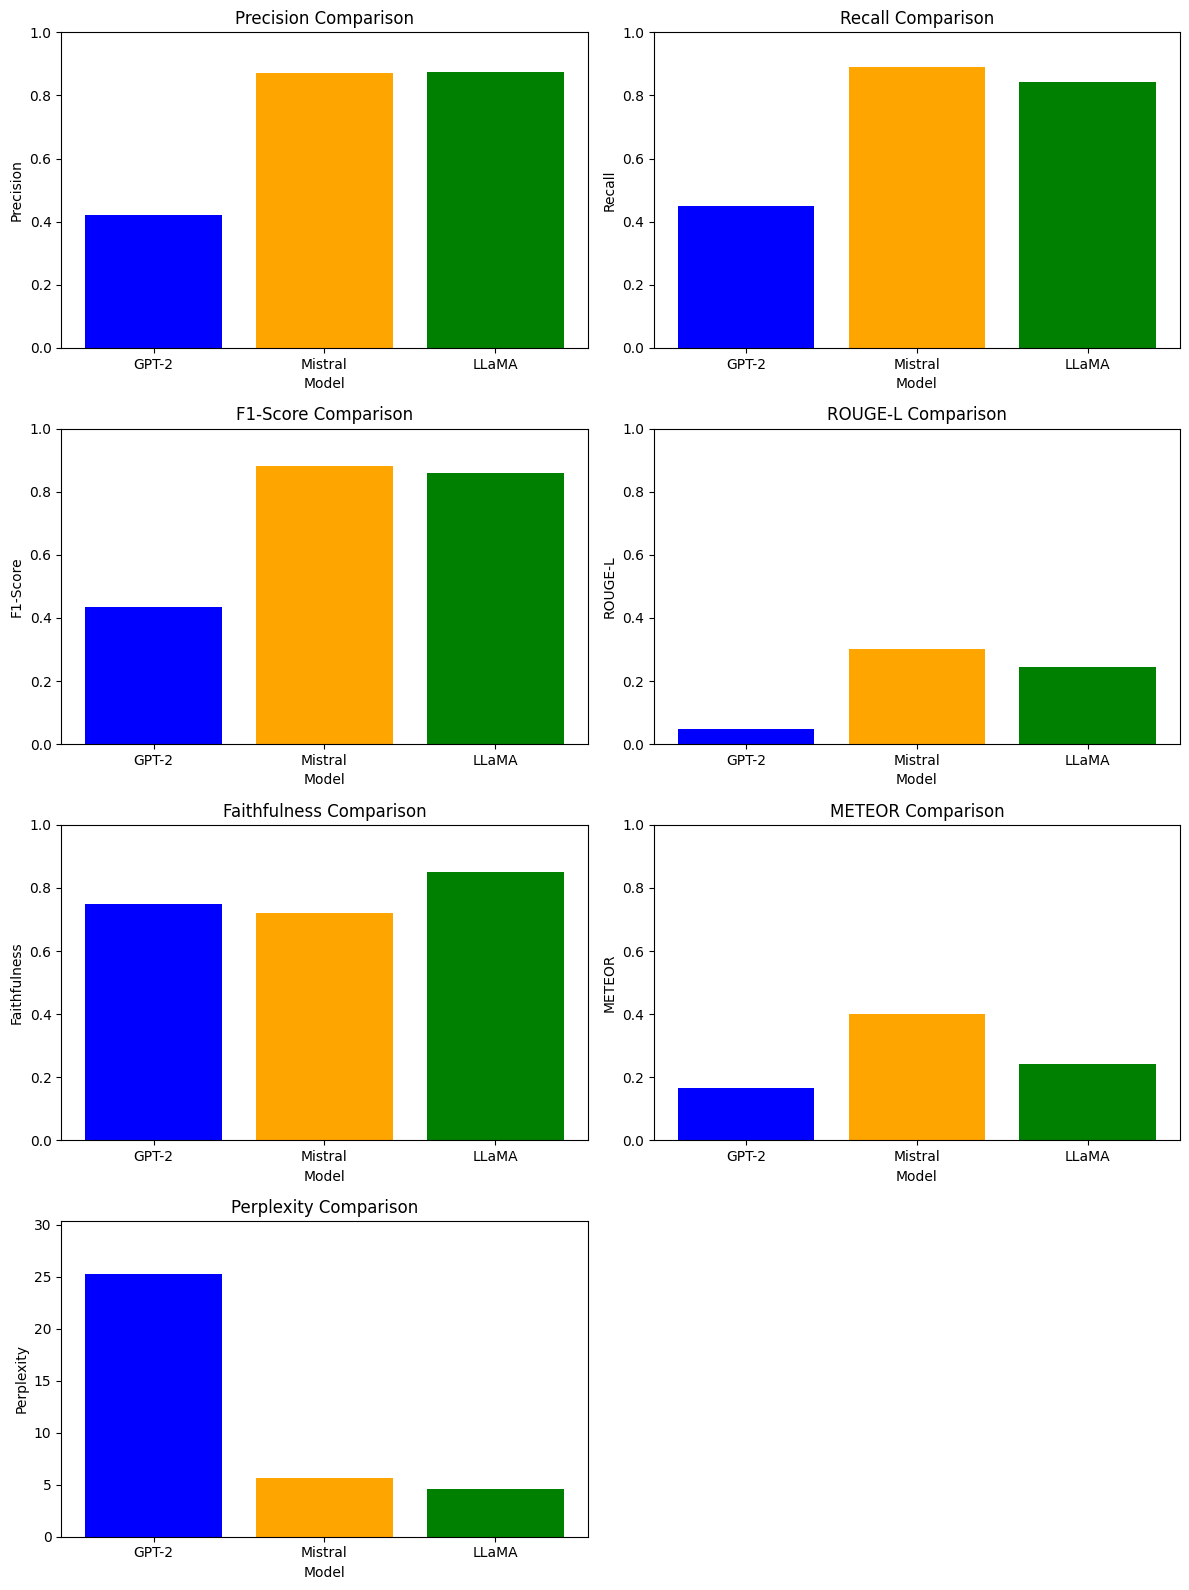

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data for the models and metrics
data = {
    'Model': ['GPT-2', 'Mistral', 'LLaMA'],
    'Precision': [0.4222, 0.872440, 0.875465],
    'Recall': [0.4500, 0.889085, 0.844128],
    'F1-Score': [0.4357, 0.880684, 0.859511],
    'ROUGE-L': [0.04773869, 0.300518, 0.243478],
    'Faithfulness': [0.75, 0.719846, 0.850641],
    'METEOR': [0.1649, 0.399802, 0.241953],
    'Perplexity': [25.29, 5.602944, 4.595966]  # Added Perplexity
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 rows, 2 columns
axes = axes.flatten()

# Define the metrics to plot
metrics = ['Precision', 'Recall', 'F1-Score', 'ROUGE-L', 'Faithfulness', 'METEOR', 'Perplexity']

# Plot each metric for comparison
for i, metric in enumerate(metrics):
    axes[i].bar(df['Model'], df[metric], color=['blue', 'orange', 'green'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1) if metric != 'Perplexity' else axes[i].set_ylim(0, max(df['Perplexity']) * 1.2)  # Adjust Perplexity y-axis

# Remove the last empty axis
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()
